## Reproduction Wang et al

In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.patches import Ellipse
import matplotlib.patheffects as pe

# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# decision trees
from sklearn.tree import DecisionTreeRegressor
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# support vector machines
from sklearn.svm import SVR
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# metrics
from sklearn.metrics import mean_absolute_error

# neural network
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

# we use it to interact with the file system
import os
# compute time
from time import time, sleep
# iterator
import itertools
# handling json file
import json

# no warning
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Figure 1

In [2]:
tech_df = pd.read_csv("./data/techpower_hard.csv")

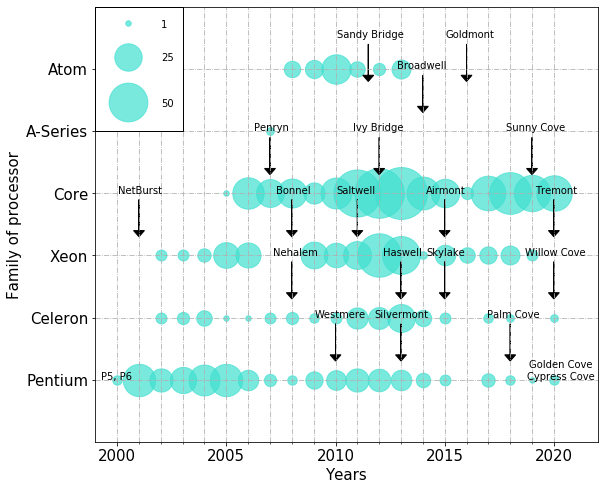

In [3]:
tech_df_intel = tech_df.query("Producer == 'Intel'")

test_df = tech_df_intel.groupby(["Range","rel_year"]).count()

vals = tech_df_intel["Range"].unique()
years = [k for k in range(2000, 2021)]


fig, ax = plt.subplots(figsize=((9,8)))

for y in years:
    for i in range(len(vals)):
        lab = vals[i]
        if (lab, y) in test_df.index:
            ax.scatter(y, i, s = 30*test_df.loc[(lab,y)]["Producer"], color = "turquoise", alpha =0.7)

            
arch_names = ["P5, P6", "NetBurst", "Penryn", "Nehalem", "Bonnel", 
              "Westmere", "Saltwell", "Sandy Bridge", "Ivy Bridge", "Silvermont",
              "Haswell",  "Broadwell ", "Airmont", "Skylake", "Goldmont",
              "Palm Cove", "Sunny Cove", "Tremont", "Willow Cove", "Cypress Cove",
              "Golden Cove"]
arch_years = [2000, 2001, 2007, 2008, 2008, 
              2010, 2011, 2011.5, 2012, 2013, 
              2013, 2014, 2015, 2015, 2016,
              2018, 2019, 2020, 2020, 2020.2,
              2020.2]
arch_position = [0, 3, len(vals)-2, 2, 3, 
                 1, 3, 5.5, len(vals)-2, 1, 
                 2, 5, 3, 2, 5.5,
                 1, 4, 3, 2, 0,
                 0.2]
arch_decal = [1, 0, 0, 0, 0, 
              0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 1,
              1]
  
for i in range(len(arch_names)):
    ax.text(arch_years[i]-0.12*len(arch_names[i]), arch_position[i], arch_names[i])
    if not arch_decal[i]:
        ax.arrow(arch_years[i], arch_position[i]-0.1, 0, 
                 -0.5, head_width=0.5, head_length=0.1, fc='k', ec='k')

plt.xlabel("Years", size= 15)
plt.ylabel("Family of processor", size = 15)
ax.set_xticks([k for k in years if k %5==0], minor=False)
ax.set_xticklabels([k for k in years if k %5==0], Fontsize =15)
ax.set_xticks(years, minor=True)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor', linestyle = '-.')
plt.yticks(range(len(vals)), vals, size =15)

ax.grid(zorder=0, linestyle = '-.')
plt.xlim((1999, 2022))
plt.ylim(-1,len(vals))
ax.add_patch(pat.Rectangle(
        (1999, len(vals)-2),
        4,
        2,
        edgecolor = 'black',
        facecolor = 'white',
        fill=True,
        zorder=3
 ))

plt.scatter(2000.5, len(vals)-0.4*2/3, s = 30, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-0.5*2/3,"1")
plt.scatter(2000.5, len(vals)-1.2*2/3, s =30*25, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-1.3*2/3,"25")
plt.scatter(2000.5, len(vals)-2.3*2/3, s =30*50, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-2.4*2/3,"50")

plt.savefig('./results/fig1_intel.png', dpi=300)
plt.show()

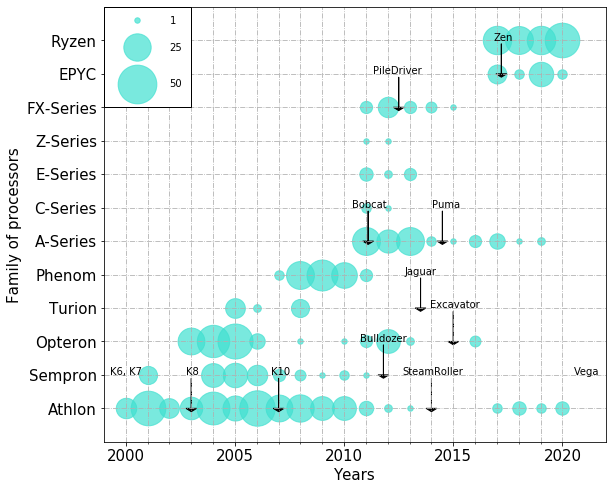

In [4]:
tech_df_intel = tech_df.query("Producer == 'AMD'")

test_df = tech_df_intel.groupby(["Range","rel_year"]).count()

vals = tech_df_intel["Range"].unique()
years = [k for k in range(2000, 2021)]


fig, ax = plt.subplots(figsize=((9,8)))

for y in years:
    for i in range(len(vals)):
        lab = vals[i]
        if (lab, y) in test_df.index:
            ax.scatter(y, i, s = 30*test_df.loc[(lab,y)]["Producer"], color = "turquoise", alpha =0.7)


arch_names = ["Bulldozer", "PileDriver", "SteamRoller", "Excavator", "Bobcat", "Jaguar", "Puma", "Zen",
             "K10", "K6, K7", "K8", "Vega"]
arch_years = [2011.8, 2012.5, 2014, 2015, 2011.1, 2013.5, 2014.5, 2017.2, 2007, 2000, 2003, 2021]
arch_position = [2, len(vals)-2, 1, 3, 6, 4, 6, len(vals)-1, 1, 1, 1, 1]
arch_decal = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
       
for i in range(len(arch_names)):
    ax.text(arch_years[i]-0.12*len(arch_names[i]), arch_position[i], arch_names[i])
    if not arch_decal[i]:
        ax.arrow(arch_years[i], arch_position[i]-0.1, 0, 
                 -0.9, head_width=0.5, head_length=0.1, fc='k', ec='k')
            
plt.xlabel("Years", size= 15)
plt.ylabel("Family of processors", size = 15)
ax.set_xticks([k for k in years if k %5==0], minor=False)
ax.set_xticklabels([k for k in years if k %5==0], Fontsize =15)
ax.set_xticks(years, minor=True)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor', linestyle = '-.')
plt.yticks(range(len(vals)), vals, size =15)

ax.grid(zorder=0, linestyle = '-.')
plt.xlim((1999, 2022))
plt.ylim(-1,len(vals))
ax.add_patch(
    pat.Rectangle(
        (1999, len(vals)-3),
        4,
        3,
        edgecolor = 'black',
        facecolor = 'white',
        fill=True,
        zorder=3))

plt.scatter(2000.5, len(vals)-0.4, s = 30, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-0.5,"1")
plt.scatter(2000.5, len(vals)-1.2, s =30*25, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-1.3,"25")
plt.scatter(2000.5, len(vals)-2.3, s =30*50, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-2.4,"50")

plt.savefig('./results/fig1_amd.png', dpi=300)
plt.show()

### Figure 2

In [5]:
system_dir = './data/systems/'
hard_dir = './data/procs/'

to_keep = ['nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore','ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips', 'ls_virtualization',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_coreid', 'cp_cpucores', 'cp_apicid', 'cp_initialapicid',
           'cp_fpu', 'cp_fpu_exception', 'cp_cpuidlevel', 'cp_wp',
           'cp_bogomips', 'cp_clflushsize', 'cp_cache_alignment', 'cp_addresssizes', 'ls_range']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 
       'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_cpumhz', 'cp_cachesize', 
       'cp_siblings', 'cp_cpucores', 'cp_fpu', 'cp_fpu_exception', 'cp_bogomips', 'ls_range']

categ = ['ls_architecture', 'ls_cpuop-mode', 'cp_addresssizes']
#

not_modif = ['ls_range']

# separate average perfs from standard deviations
def separate_perf(perf):
    raw_perf = []
    std_perf = []

    for p in perf:
        tab = str(p).replace(" ", "").split("+/-")
        raw_perf.append(tab[0])
        if len(tab) > 1:
            std_perf.append(tab[1])
        else:
            std_perf.append('')

    return (raw_perf, std_perf)

# load SKU information
envs = pd.read_csv("data/ls_cp_info_modif.csv").set_index("idPhoronix")
# we only keep the skus for which there is only one processor working
envs = envs.query("ls_cpu!='NaN'").query("nb_models==1")[to_keep]
envs = envs[num].join(pd.get_dummies(envs[categ]))

# standardise sku info
for col in envs.columns:
    if col not in not_modif:
        envs[col] = [(k-np.mean(envs[col]))/np.std(envs[col]) for k in envs[col]]

# add profile information
for sys_name in os.listdir(system_dir):
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>10:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            score = [k*(-1) for k in score]
        score = [(k-np.mean(score))/np.std(score) for k in score]
        sys.loc[:, sys_name[:-4]] = score
        sys = sys.set_index("id")
        sys = sys.drop(["idproc", "percentile", "descproc", "nbproc", "perf"], axis = 1)
        envs = envs.join(sys)

envs["scores"] = [np.mean(envs.iloc[i][30:envs.shape[1]]) for i in range(envs.shape[0])]
#envs = envs.drop(envs.columns[30:envs.shape[1]], axis=1)
envs

,nb_models,ls_cpu,ls_threadpercore,ls_corepersocket,ls_socket,ls_numanode,ls_cpumhz,ls_cpumaxmhz,ls_cpuminmhz,ls_bogomips,...,pts-t-test1,pts-vkpeak,pts-cpuminer-opt,pts-hdparm-read,pts-optcarrot,pts-betsy,pts-rocksdb,pts-f12015,pts-smhasher,scores
AArch64rev4,NaN,-0.349958,-0.899367,-0.488269,2.650734,NaN,NaN,-1.887124,-1.205116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.180573
AMDA10-4600MAPU,NaN,-0.349958,0.554929,-0.405927,-0.126089,NaN,-0.044795,NaN,NaN,-0.376518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.741924
AMDA10-5800KAPU,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.026578,NaN,NaN,1.269770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554143
AMDA10-6700APU,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.041759,0.609093,1.191496,1.161168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.280961
AMDA10-7700KAPUwithRadeonR7,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.034169,NaN,NaN,1.490392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POWER98-Core,NaN,0.700969,3.463520,0.088130,-0.126089,-0.166675,NaN,0.715044,1.856011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.097833
POWER980-Core,NaN,2.502558,9.280703,-0.488269,8.204381,1.525497,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352270
POWER9altivecsupported44-Core,NaN,6.105736,3.463520,1.240928,0.799519,1.525497,NaN,0.715044,1.834223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101195
POWER9altivecsupported64-Core,NaN,1.902028,3.463520,0.088130,0.799519,1.525497,NaN,0.715044,1.834223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.172493


In [6]:
res = []

for sys_name in os.listdir(system_dir):
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    res.append(sys.shape[0]/envs.shape[0])

print(np.mean(res))

0.1033454126056343


In [7]:
s = 0
for sys_name in os.listdir(system_dir):
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>10:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            s+=1
s

153

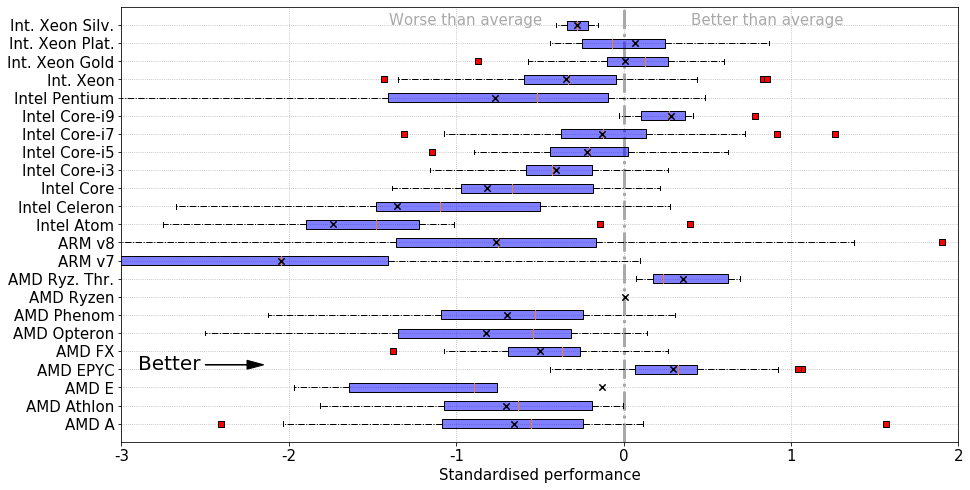

In [8]:
values = envs["ls_range"].unique()[1:]
val_modif =  ['AMD A', 'AMD Athlon', 'AMD E', 'AMD EPYC', 'AMD FX',
       'AMD Opteron', 'AMD Phenom', 'AMD Ryzen', 'AMD Ryz. Thr.',
       'ARM v7', 'ARM v8', 'Intel Atom', 'Intel Celeron', 'Intel Core',
       'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core-i9',
       'Intel Pentium', 'Int. Xeon', 'Int. Xeon Gold',
       'Int. Xeon Plat.', 'Int. Xeon Silv.']

score_dict = dict()
scores = []
for val in values:
    tab = envs.query("ls_range=='"+str(val)+"'")["scores"]
    scores.append(tab)
    score_dict[val] = tab

fig, ax = plt.subplots(figsize=((15,8)))

red_square = dict(markerfacecolor='r', marker='s')

ax.grid(zorder =0, linestyle = ':')

#ax.scatter([np.mean(l) for l in scores], range(1, 1+len(scores)),
#           marker="x", color = "white", alpha = 1, s = 20, zorder=5)
ax.scatter([np.mean(l) for l in scores], range(1, 1+len(scores)),
           marker="x", color = "black", alpha = 1, s = 40, zorder=4)

ax.boxplot(scores, flierprops=red_square,
          vert=False, patch_artist=True, widths=0.5,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

ax.arrow(-2.5, 4.25, 0.25, 0, head_width=0.5, head_length=0.1, fc='k', ec='k', color= 'red')
ax.text(s = "Better", x = -2.9, y = 4, size = 20, color = 'black')

ax.text(s = "Better than average", x = 0.4, y = 23, size = 15, color = 'darkgray')
ax.text(s = "Worse than average", x = -1.4, y = 23, size = 15, color = 'darkgray')
plt.vlines(0, ymin=0, ymax=len(values)+2, linestyle ='-.', linewidth=3, color='darkgray')

plt.xlabel("Standardised performance", size = 15)

ax.set_xticklabels([-3+k for k in range(6)], Fontsize =15)
ax.set_yticklabels(val_modif, Fontsize =15)

plt.xlim((-3,2))
plt.ylim(0,len(values)+1)



plt.savefig("./results/fig2.png", dpi=300)
plt.show()


In [9]:
np.mean(score_dict["AMD Ryzen Threadripper"])

0.3572634972842645

In [10]:
np.mean(score_dict["AMD EPYC"])

0.2951081144826769

In [11]:
np.mean(score_dict["Intel Core-i9"])

0.28415302152400257

In [12]:
np.mean(score_dict["ARM v7"])

-2.0477290466681835

In [13]:
np.mean(score_dict["Intel Core-i3"])

-0.404057164742826

In [14]:
np.mean(score_dict["Intel Xeon Platinum"])

0.07069402294871216

In [15]:
np.mean(score_dict["Intel Xeon Gold"])

0.007382011532578158

#### GeekBench

In [16]:
with open('../cpu_selection-master/geek_data.json','r') as geek_data:
    geek_df = pd.DataFrame(json.load(geek_data))
    geek_df.columns = ['model number', 'freq', 'L2', 'L3', 'memory', 
                       'bench', 'single/multicore', 'score', 'perf']

geek_models = geek_df["model number"].unique()

geek_counts = dict()
intel_names = ["xeon", "i3", "i5", "i7", "core", "pentium", "celeron", "atom", "opteron"]

for ni in intel_names:
    geek_counts[ni] = 0

for spm in geek_models:
    spm = spm.lower()
    if 'xeon' in spm:
        geek_counts["xeon"]+=1
    elif 'i3' in spm:
        geek_counts["i3"]+=1
    elif 'i5' in spm:
        geek_counts["i5"]+=1
    elif 'i7' in spm:
        geek_counts["i7"]+=1
    elif 'core' in spm:
        geek_counts["core"]+=1
    elif 'pentium' in spm:
        geek_counts["pentium"]+=1
    elif "celeron" in spm:
        geek_counts["celeron"]+=1
    elif "atom" in spm:
        geek_counts["atom"]+=1
    elif "opteron" in spm:
        geek_counts["opteron"]+=1
    else:
        print(spm)

geek_values = [k for k in geek_counts.keys()]
geek_count = [geek_counts[k] for k in geek_values]

intel
8
qualcomm qualcomm
intel 000
amd engineering sample
intel 0000
common kvm
qemu virtual version 1.5.3
qemu virtual version ( 64-rhel6)
intel e2697v
intel e2695v
amd eng sample, zs212345tgg45_30/21/20_2/16
westmere e56xx/l56xx/x56xx (nehalem-c)


#### Phoronix

In [17]:
phoronix_values = envs.groupby("ls_range").count().index
phoronix_count = [np.max(envs.groupby("ls_range").count().iloc[i]) for i in range(len(phoronix_values))]

#### TechPowerUp

In [18]:
tech_df = pd.read_csv("./data/techpower_hard.csv")
tech_values = tech_df.groupby("Range").count().index
tech_count = [tech_df.groupby("Range").count()["Producer"].iloc[i] for i in range(len(tech_values))]

#### AMD

In [19]:
amd_df = pd.read_csv("./data/amd_specs.csv")
amd_values = amd_df.groupby("Family").count().index
amd_count = [np.max(amd_df.groupby("Family").count().iloc[i]) for i in range(len(amd_values))]

#### Spec 

In [20]:
spec = pd.read_csv("../cpu_selection-master/spec_data.csv")

spec_models = spec["model number"].unique()

spec_counts = dict()
intel_names = ["xeon", "i3", "i5", "i7", "core", "pentium", "celeron", "atom", "opteron"]

for ni in intel_names:
    spec_counts[ni] = 0

for spm in spec_models:
    spm = spm.lower()
    if 'xeon' in spm:
        spec_counts["xeon"]+=1
    elif 'i3' in spm:
        spec_counts["i3"]+=1
    elif 'i5' in spm:
        spec_counts["i5"]+=1
    elif 'i7' in spm:
        spec_counts["i7"]+=1
    elif 'core' in spm:
        spec_counts["core"]+=1
    elif 'pentium' in spm:
        spec_counts["pentium"]+=1
    elif "celeron" in spm:
        spec_counts["celeron"]+=1
    elif "atom" in spm:
        spec_counts["atom"]+=1
    else:
        print(spm)

spec_values = [k for k in spec_counts.keys()]
spec_count = [spec_counts[k] for k in spec_values]

In [21]:
cols = ["GeekBench", "Phoronix", "SPEC", "TechPower", "AMD"]

#print("Phoronix")
#print(phoronix_values)
#['AMD A' 'AMD Athlon' 'AMD E' 'AMD EPYC' 'AMD FX' 'AMD Opteron'
# 'AMD Phenom' 'AMD Ryzen' 'AMD Ryzen Threadripper' 'ARM v7' 'ARM v8'
# 'Intel Atom' 'Intel Celeron' 'Intel Core' 'Intel Core-i3' 'Intel Core-i5'
# 'Intel Core-i7' 'Intel Core-i9' 'Intel Pentium' 'Intel Xeon'
# 'Intel Xeon Gold' 'Intel Xeon Platinum' 'Intel Xeon Silver']

final_dict = dict()
for i in range(len(phoronix_values)):
    val = phoronix_values[i]
    final_dict["Phoronix", val] = phoronix_count[i]

#print("Geekbench")
#print(geek_values)
#['xeon', 'i3', 'i5', 'i7', 'core', 'pentium', 'celeron', 'atom', 'opteron']
geek_values = ['Intel Xeon', 'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core', 
               'Intel Pentium','Intel Celeron',  'Intel Atom', 'AMD Opteron']

for i in range(len(geek_values)):
    val = geek_values[i]
    final_dict["GeekBench", val] = geek_count[i]

#print("SPEC")
#print(spec_values)
#['xeon', 'i3', 'i5', 'i7', 'core', 'pentium', 'celeron', 'atom', 'opteron']
spec_values = ['Intel Xeon', 'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core', 
               'Intel Pentium','Intel Celeron',  'Intel Atom', 'AMD Opteron']

for i in range(len(spec_values)):
    val = spec_values[i]
    final_dict["SPEC", val] = spec_count[i]

#print("Tech")
#print(tech_values)
#['A-Series', 'Athlon', 'Atom', 'C-Series', 'Celeron', 'Core', 'E-Series',
#       'EPYC', 'FX-Series', 'Opteron', 'Pentium', 'Phenom', 'Ryzen', 'Sempron',
#       'Turion', 'Xeon', 'Z-Series']
tech_values = ['AMD A', 'AMD Athlon', 'Intel Atom',  'AMD C', 'Intel Celeron', 'Intel Cores',
                'AMD E', 'AMD EPYC', 'AMD FX', 'AMD Opteron', 'Intel Pentium', 'AMD Phenom', 'AMD Ryzen', 'AMD Sempron',  
                'AMD Turion', 'Intel Xeon', 'AMD Z']

for i in range(len(tech_values)):
    val = tech_values[i]
    final_dict["TechPower", val] = tech_count[i]

#print("AMD")
#print(amd_values)
#['AMD', 'AMD A-Series Processors', 'AMD Athlon™ Processors',
#       'AMD E-Series Processors', 'AMD EPYC™', 'AMD FX-Series Processors',
#       'AMD Opteron™', 'AMD Phenom™', 'AMD Ryzen™ Processors', 'AMD Sempron™', 'AMD Turion™']

amd_values = ['AMD', 'AMD A', 'AMD Athlon', 'AMD E', 'AMD EPYC', 'AMD FX', 
              'AMD Opteron', 'AMD Phenom', 'AMD Ryzen', 'AMD Sempron', 
              'AMD Turion']

for i in range(len(amd_values)):
    val = amd_values[i]
    final_dict["AMD", val] = amd_count[i]

final_values = []

for pho_val in phoronix_values:
    if pho_val not in final_values:
        final_values.append(pho_val)

for spec_val in spec_values:
    if spec_val not in final_values:
        final_values.append(spec_val)

for tech_val in tech_values:
    if tech_val not in final_values:
        final_values.append(tech_val)

for amd_val in amd_values:
    if amd_val not in final_values:
        final_values.append(amd_val)

final_values = final_values[:len(final_values)-1]
final_values

['AMD A',
 'AMD Athlon',
 'AMD E',
 'AMD EPYC',
 'AMD FX',
 'AMD Opteron',
 'AMD Phenom',
 'AMD Ryzen',
 'AMD Ryzen Threadripper',
 'ARM v7',
 'ARM v8',
 'Intel Atom',
 'Intel Celeron',
 'Intel Core',
 'Intel Core-i3',
 'Intel Core-i5',
 'Intel Core-i7',
 'Intel Core-i9',
 'Intel Pentium',
 'Intel Xeon',
 'Intel Xeon Gold',
 'Intel Xeon Platinum',
 'Intel Xeon Silver',
 'AMD C',
 'Intel Cores',
 'AMD Sempron',
 'AMD Turion',
 'AMD Z']

In [22]:
fig3_df = pd.DataFrame()
fig3_df["model"] = final_values
fig3_df = fig3_df.set_index("model")

for c in cols:
    fig3_df[c] = [final_dict[(c, val)] if (c, val) in final_dict else 0 for val in final_values]

#fig3_df.to_csv("./results/fig3.csv")
# manual regrouping and removing ARM architectures

In [23]:
fig3_df = pd.read_csv("./results/fig3.csv")
fig3_amd_df = pd.read_csv("./results/fig3_amd.csv")

for i in range(len(cols)):
    col = cols[i]
    for j in range(i,len(cols)):
        col2 = cols[j]
        if col == "AMD" or col2 == "AMD":
            print(col, col2, stats.ks_2samp(fig3_amd_df[col], fig3_amd_df[col2]).pvalue)
        else:
            print(col, col2, stats.ks_2samp(fig3_df[col], fig3_df[col2]).pvalue)

GeekBench GeekBench 1.0
GeekBench Phoronix 0.0005909905798671092
GeekBench SPEC 0.7102038997076623
GeekBench TechPower 0.001920719384568105
GeekBench AMD 0.0014969550573265746
Phoronix Phoronix 1.0
Phoronix SPEC 0.001920719384568105
Phoronix TechPower 0.07789836549197329
Phoronix AMD 0.5360977695073805
SPEC SPEC 1.0
SPEC TechPower 0.03561137027640743
SPEC AMD 0.00020413023508998745
TechPower TechPower 1.0
TechPower AMD 0.5360977695073805
AMD AMD 1.0


### Figure 4

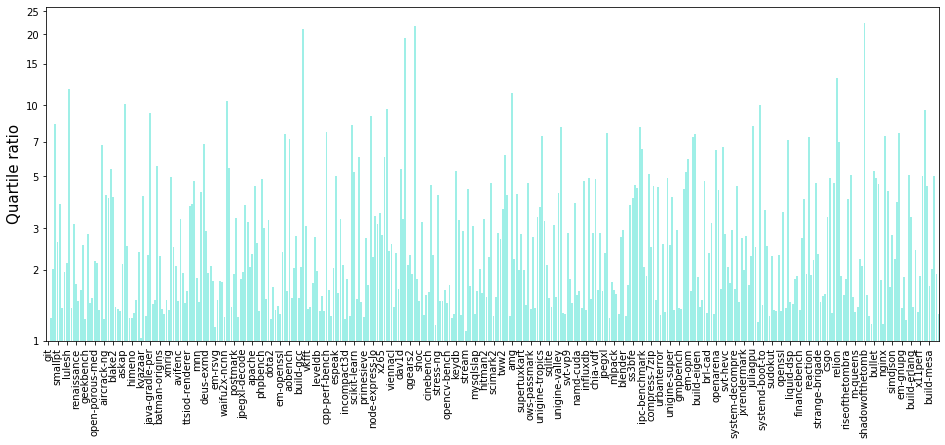

In [24]:
# load SKU information
envs = pd.read_csv("data/ls_cp_info_modif.csv").set_index("idPhoronix")
# we only keep the skus for which there is only one processor working
envs = envs.query("ls_cpu!='NaN'").query("nb_models==1")[to_keep]
envs = envs[num].join(pd.get_dummies(envs[categ]))
names = os.listdir(system_dir)

qratios = []

# add profile information
for sys_name in names:
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>5:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            score = [k*(-1) for k in score]
        sys.loc[:, sys_name[:-4]] = score
        qratios.append(max(np.nanpercentile(score,75)/np.nanpercentile(score,25),
               np.nanpercentile(score,25)/np.nanpercentile(score,75)))


ns = [names[i] for i in range(len(qratios)) if not np.isnan(qratios[i])]
qrs = [qr for qr in qratios if not np.isnan(qr)]

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(range(1, len(qrs)+1), [np.log10(k) for k in qrs], color = "turquoise", alpha = 0.5)

plt.xticks([k for k in range(len(qrs)) if k%4==0], 
           [ns[i][4:][:-4][0:15] for i in range(len(ns)) if i%4==0], 
           rotation='vertical')

plt.xlim(-1, 384)

t = [1, 2, 3, 5, 7, 10, 15, 20, 25]

ticks = []
ticks.extend([np.round(np.log10(k),3) for k in t])

labticks = []
labticks.extend(t)

plt.yticks(ticks, labticks)

#ax.set_yscale('log')
#ax.set_yticklabels([k*2 for k in range(8)], Fontsize =15)

plt.ylabel("Quartile ratio", size = 15)

plt.subplots_adjust(bottom=0.3)

plt.savefig("./results/fig4.png", dpi = 300)

plt.show()

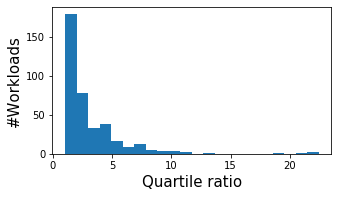

In [25]:
plt.figure(figsize= (5,3))
plt.hist(qratios, bins = 22)
plt.ylabel("#Workloads", size = 15 )
plt.xlabel("Quartile ratio", size=15)
plt.subplots_adjust(bottom=0.2)
plt.savefig("./results/fig4b.png", dpi=300)
plt.show()

In [26]:
ns[np.argmax(qrs)]
np.max(qrs)

22.416666666666668

### Figure 5

In [27]:
# load SKU information
envs = pd.read_csv("data/ls_cp_info_modif.csv").set_index("idPhoronix")
# we only keep the skus for which there is only one processor working
envs = envs.query("ls_cpu!='NaN'").query("nb_models==1")[to_keep]
envs = envs[num].join(pd.get_dummies(envs[categ]))

# standardise skuy info
for col in envs.columns:
    if col not in not_modif:
        envs[col] = [(k-np.mean(envs[col]))/np.std(envs[col]) for k in envs[col]]

# add profile information
for sys_name in os.listdir(system_dir):
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>10:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            score = [k*(-1) for k in score]
        score = [(k-np.mean(score))/np.std(score) for k in score]
        sys.loc[:, sys_name[:-4]] = score
        sys = sys.set_index("id")
        sys = sys.drop(["idproc", "percentile", "descproc", "nbproc", "perf"], axis = 1)
        envs = envs.join(sys)

#envs["scores"] = [np.mean(envs.iloc[i][30:envs.shape[1]]) for i in range(envs.shape[0])]
envs = envs.drop(envs.columns[:30], axis=1)
envs_copy = envs
envs = envs.fillna(0).transpose()

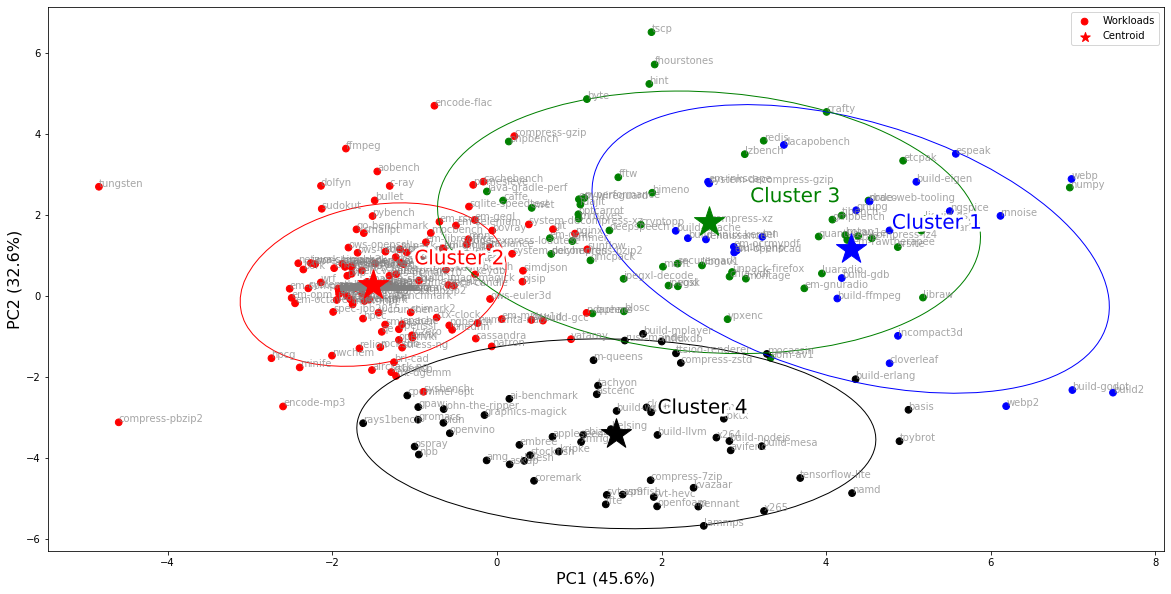

1 blue
['system-openscad', 'pts-renaissance', 'pts-gnupg', 'pts-build-godot', 'pts-system-decompress-gzip', 'system-inkscape', 'pts-webp', 'pts-dacapobench', 'pts-espeak', 'pts-incompact3d', 'pts-build-apache', 'pts-build2', 'pts-build-gdb', 'pts-compress-xz', 'pts-build-ffmpeg', 'pts-draco', 'pts-build-php', 'system-hugin', 'system-rawtherapee', 'pts-webp2', 'pts-build-eigen', 'system-ocrmypdf', 'pts-ngspice', 'pts-tnn', 'pts-cloverleaf', 'pts-build-linux-kernel', 'pts-rnnoise']
2 red
['pts-git', 'pts-php', 'pts-smallpt', 'pts-pts-self-test', 'pts-arrayfire', 'pts-onnx', 'pts-java-scimark2', 'pts-rbenchmark', 'pts-geekbench', 'pts-plaidml', 'pts-mandelgpu', 'pts-aircrack-ng', 'pts-build-imagemagick', 'pts-blake2', 'pts-neatbench', 'pts-node-octane', 'system-gegl', 'pts-mencoder', 'pts-etqw-demo', 'pts-trislam', 'pts-nwchem', 'system-mpv', 'pts-mixbench', 'pts-batman-origins', 'pts-dow3', 'pts-neat', 'pts-mkl-dnn', 'pts-core-latency', 'pts-mpcbench', 'pts-metroll-redux', 'pts-ctx-clock

In [28]:
# k-means

rs = 42
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state= rs)
kmeans.fit(envs)
groups = kmeans.predict(envs)

colors = ["blue", "red", "green", "black", 'lightgrey', "yellow", 
          "orange", "pink", 'purple',  'lightgreen', 'lightblue']



# PCA
p = PCA(n_components = 3, random_state = rs)

names = [k for k in envs.index]

pca_result = p.fit_transform(envs)

plt.figure(figsize = (20, 10))
ax = plt.subplot(111)
ax.scatter(pca_result[:, 0], 
           pca_result[:, 1],
           color= [colors[groups[i]] for i in range(len(groups))],
           #cmap=cmap,
           label = "Workloads",
           s=45)


pops = []
for i in range(len(colors)):
    pops.append(pat.Patch(color=colors[i], label=values[i]))

imp = p.explained_variance_/np.sum(p.explained_variance_)

def eigsorted(cov): 
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

for i in range(n_clusters):
    x = pca_result[np.where(groups==i), 0] 
    y = pca_result[np.where(groups==i), 1] 
    
    cov = np.cov(x, y) 
    vals, vecs = eigsorted(cov) 
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1])) 
    w, h = 4 * np.sqrt(vals) 
    
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w,
                  height=h,
                  angle=theta,
                  color=colors[i])
    #plt.scatter(np.mean(x), np.mean(y), color="black", marker="*", s =1000, zorder =4)
    if i ==1:
        plt.scatter(np.mean(x), np.mean(y), color=colors[i], marker="*", s =100, zorder =5, label = "Centroid")
    plt.scatter(np.mean(x), np.mean(y), color=colors[i], marker="*", s =1000, zorder =5)
    ell.set_facecolor('none')
    plt.text(np.mean(x)+0.5, np.mean(y)+0.5, "Cluster "+str(i+1), c = colors[i], size=20,
            path_effects=[pe.withStroke(linewidth=6, foreground="white")], zorder=4)
    ax.add_artist(ell)


for i in range(len(names)):
    plt.text(pca_result[:, 0][i], 
            pca_result[:, 1][i],
            envs.index[i][4:], 
             color="gray",
            alpha = 0.7)

imp = p.explained_variance_/np.sum(p.explained_variance_)

plt.ylabel("PC2 ("+str(100*np.round(imp[1],3))+
           "%)", size=16)
plt.xlabel("PC1 ("+str(100*np.round(imp[0],3))
           +"%)", size = 16)
plt.legend()
#plt.ylim([-3, 8])
#plt.xlim([-2.5, 15])
plt.savefig("./results/fig5.png", dpi = 300)
plt.show()

for i in range(n_clusters):
    print(i+1, colors[i])
    print([names[j] for j in range(len(groups)) if groups[j]==i])

### Figure 6

In [2]:
system_dir = './data/systems/'
hard_dir = './data/procs/'

envs = pd.read_csv("data/ls_cp_info_post_join.csv").set_index("idPhoronix")
envs.head()

to_keep = ['perf', 'nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore',
           'ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
           'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize',
           'cp_cache_alignment', 'cp_addresssizes', 'ls_range', 'price_dollar',
           'TDP', 'Process', 'Release Year']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpufamily', 'ls_model', 'ls_stepping',  'ls_cpumhz', 'ls_cpumaxmhz', 
       'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache',
       'cp_cpufamily', 'cp_model', 'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
       'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
       'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize', 
       'cp_cache_alignment', 'price_dollar', 'TDP', 'Process', 'Release Year']

categ = ['ls_architecture', 'ls_cpuop-mode', 'ls_vendorid', 'cp_vendor_id', 'cp_addresssizes', 'ls_range']

# separate average perfs from standard deviations
def separate_perf(perf):
    raw_perf = []
    std_perf = []

    for p in perf:
        tab = str(p).replace(" ", "").split("+/-")
        raw_perf.append(tab[0])
        if len(tab) > 1:
            std_perf.append(tab[1])
        else:
            std_perf.append('')

    return (raw_perf, std_perf)

In [3]:
def case1(algo):
    
    # compute use case 1 for the algorithm "algo"
    
    names = []
    maes = []
    maes_amd = []
    maes_intel = []
    bad_sys = []
    nbindiv = []

    for sys_name in os.listdir(system_dir):

        try:

            sys = pd.read_csv(system_dir+sys_name, index_col = 0)

            if sys.shape[0] > 150:

                sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]

                sys = sys.set_index("id")

                perf_meta = sys.join(envs)[to_keep].query("ls_cpu!='NaN'").query("ls_vendorid=='AuthenticAMD' or ls_vendorid=='GenuineIntel'").fillna("0")
                #.query("nb_models==1")
                avg, std = separate_perf(perf_meta["perf"])

                perf_meta.loc[:, "avg"] = avg

                del perf_meta["perf"]

                X = perf_meta[num].join(pd.get_dummies(perf_meta[categ]))
                y = [float(k) for k in perf_meta["avg"]]
                y = (y-np.mean(y))/np.std(y)

                inter_mae = []
                inter_mae_amd = []
                inter_mae_intel = []

                for i in range(20):

                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

                    alg = algo

                    alg.fit(X_train,y_train)

                    y_pred = alg.predict(X_test)

                    inter_mae.append(mean_absolute_error(y_test, y_pred))

                    y_test_intel = [y_test[j] for j in range(len(X_test)) if X_test["ls_vendorid_GenuineIntel"][j]]
                    y_pred_intel = [y_pred[j] for j in range(len(X_test)) if X_test["ls_vendorid_GenuineIntel"][j]]

                    if len(y_test_intel) > 0:
                        inter_mae_intel.append(mean_absolute_error(y_test_intel, y_pred_intel))

                    y_test_amd = [y_test[j] for j in range(len(X_test)) if X_test["ls_vendorid_AuthenticAMD"][j]]
                    y_pred_amd = [y_pred[j] for j in range(len(X_test)) if X_test["ls_vendorid_AuthenticAMD"][j]]

                    if len(y_test_amd) > 0:
                        inter_mae_amd.append(mean_absolute_error(y_test_amd, y_pred_amd))

                maes.append(np.median(inter_mae))
                maes_amd.append(np.median(inter_mae_amd))
                maes_intel.append(np.median(inter_mae_intel))
                names.append(sys_name)
                nbindiv.append(sys.shape[0])

        except:
            bad_sys.append(sys_name)
    
    return (maes, maes_amd, maes_intel, names)


## Linear Regression

In [29]:
lr_avg, lr_amd, lr_intel, lr_name = case1(ElasticNet(l1_ratio=1))

In [30]:
np.mean(lr_avg)

0.3793894320516682

## Decision Tree

In [31]:
dt_avg, dt_amd, dt_intel, dt_name = case1(DecisionTreeRegressor())

## Random Forest

In [32]:
rf_avg, rf_amd, rf_intel, rf_name = case1(RandomForestRegressor())

## Gradient Boosting Tree

In [33]:
gb_avg, gb_amd, gb_intel, gb_name = case1(GradientBoostingRegressor())

## Support Vector Regressor

In [34]:
sv_avg, sv_amd, sv_intel, sv_name = case1(SVR)

## Neural Networks

In [25]:
names = []
maes = []
maes_amd = []
maes_intel = []
bad_sys = []
nbindiv = []

rms = RMSprop(learning_rate=0.001)

for sys_name in os.listdir(system_dir):
    
    try:
        sys = pd.read_csv(system_dir+sys_name, index_col = 0)

        if sys.shape[0] > 150:

            sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]

            sys = sys.set_index("id")

            perf_meta = sys.join(envs)[to_keep].query("ls_cpu!='NaN'").query("ls_vendorid=='AuthenticAMD' or ls_vendorid=='GenuineIntel'").fillna("0")

            avg, std = separate_perf(perf_meta["perf"])

            perf_meta.loc[:, "avg"] = avg

            del perf_meta["perf"]

            X = perf_meta[num].join(pd.get_dummies(perf_meta[categ]))
            for col in X.columns:
                X_fl = np.array(X[col], float)
                if np.std(X_fl)!=0:
                    X[col] = (X_fl-np.mean(X_fl))/np.std(X_fl)
            y = [float(k) for k in perf_meta["avg"]]
            y = (y-np.mean(y))/np.std(y)

            inter_mae = []
            inter_mae_amd = []
            inter_mae_intel = []
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

            model = Sequential()

            model.add(Dense(X_train.shape[1],input_shape=(X_train.shape[1],)))
            model.add(Dense(100, activation = 'tanh'))
            #model.add(Dropout(0.5))
            model.add(Dense(100, activation = 'tanh'))
            model.add(Dense(100, activation = 'tanh'))
            #model.add(Dropout(0.2))
            model.add(Dense(1))

            model.compile(loss = 'mae', optimizer = rms)

            model.fit(np.array(X_train, dtype=float), y_train, epochs = 300, verbose =1)

            y_pred = model.predict(np.array(X_test, dtype=float))

            inter_mae.append(mean_absolute_error(y_test, y_pred))

            y_test_intel = [y_test[j] for j in range(len(X_test)) if X_test["ls_vendorid_GenuineIntel"][j]]
            y_pred_intel = [y_pred[j] for j in range(len(X_test)) if X_test["ls_vendorid_GenuineIntel"][j]]

            if len(y_test_intel) > 0:
                inter_mae_intel.append(mean_absolute_error(y_test_intel, y_pred_intel))

            y_test_amd = [y_test[j] for j in range(len(X_test)) if X_test["ls_vendorid_AuthenticAMD"][j]]
            y_pred_amd = [y_pred[j] for j in range(len(X_test)) if X_test["ls_vendorid_AuthenticAMD"][j]]

            if len(y_test_amd) > 0:
                inter_mae_amd.append(mean_absolute_error(y_test_amd, y_pred_amd))

            maes.append(np.median(inter_mae))
            maes_amd.append(np.median(inter_mae_amd))
            maes_intel.append(np.median(inter_mae_intel))
            names.append(sys_name)
            nbindiv.append(sys.shape[0])
    
    except:
        bad_sys.append(sys_name)

Epoch 1/300
105/105 [==============================] - 0s 3ms/step - loss: 1.6156
Epoch 2/300
105/105 [==============================] - 0s 415us/step - loss: 0.6405
Epoch 3/300
105/105 [==============================] - 0s 207us/step - loss: 0.4756
Epoch 4/300
105/105 [==============================] - 0s 164us/step - loss: 0.4219
Epoch 5/300
105/105 [==============================] - 0s 402us/step - loss: 0.4414
Epoch 6/300
105/105 [==============================] - 0s 236us/step - loss: 0.4737
Epoch 7/300
105/105 [==============================] - 0s 430us/step - loss: 0.3905
Epoch 8/300
105/105 [==============================] - 0s 467us/step - loss: 0.3752
Epoch 9/300
105/105 [==============================] - 0s 347us/step - loss: 0.3735
Epoch 10/300
105/105 [==============================] - 0s 405us/step - loss: 0.3867
Epoch 11/300
105/105 [==============================] - 0s 379us/step - loss: 0.3559
Epoch 12/300
105/105 [==============================] - 0s 367us/step - loss

105/105 [==============================] - 0s 92us/step - loss: 0.0567
Epoch 193/300
105/105 [==============================] - 0s 254us/step - loss: 0.0681
Epoch 194/300
105/105 [==============================] - 0s 198us/step - loss: 0.0447
Epoch 195/300
105/105 [==============================] - 0s 91us/step - loss: 0.0741
Epoch 196/300
105/105 [==============================] - 0s 187us/step - loss: 0.0622
Epoch 197/300
105/105 [==============================] - 0s 88us/step - loss: 0.0346
Epoch 198/300
105/105 [==============================] - 0s 172us/step - loss: 0.0708
Epoch 199/300
105/105 [==============================] - 0s 89us/step - loss: 0.0471
Epoch 200/300
105/105 [==============================] - 0s 100us/step - loss: 0.0665
Epoch 201/300
105/105 [==============================] - 0s 85us/step - loss: 0.0654
Epoch 202/300
105/105 [==============================] - 0s 96us/step - loss: 0.0636
Epoch 203/300
105/105 [==============================] - 0s 105us/step - l

154/154 [==============================] - 0s 135us/step - loss: 0.1950
Epoch 84/300
154/154 [==============================] - 0s 152us/step - loss: 0.1876
Epoch 85/300
154/154 [==============================] - 0s 126us/step - loss: 0.1370
Epoch 86/300
154/154 [==============================] - 0s 127us/step - loss: 0.2287
Epoch 87/300
154/154 [==============================] - 0s 95us/step - loss: 0.1689
Epoch 88/300
154/154 [==============================] - 0s 133us/step - loss: 0.1572
Epoch 89/300
154/154 [==============================] - 0s 168us/step - loss: 0.1451
Epoch 90/300
154/154 [==============================] - 0s 71us/step - loss: 0.2156
Epoch 91/300
154/154 [==============================] - 0s 213us/step - loss: 0.1898
Epoch 92/300
154/154 [==============================] - 0s 98us/step - loss: 0.1516
Epoch 93/300
154/154 [==============================] - 0s 301us/step - loss: 0.1871
Epoch 94/300
154/154 [==============================] - 0s 102us/step - loss: 0.1

154/154 [==============================] - 0s 196us/step - loss: 0.0955
Epoch 274/300
154/154 [==============================] - 0s 199us/step - loss: 0.0599
Epoch 275/300
154/154 [==============================] - 0s 163us/step - loss: 0.0953
Epoch 276/300
154/154 [==============================] - 0s 123us/step - loss: 0.0697
Epoch 277/300
154/154 [==============================] - 0s 111us/step - loss: 0.0785
Epoch 278/300
154/154 [==============================] - 0s 92us/step - loss: 0.0814
Epoch 279/300
154/154 [==============================] - 0s 150us/step - loss: 0.0786
Epoch 280/300
154/154 [==============================] - 0s 101us/step - loss: 0.0838
Epoch 281/300
154/154 [==============================] - 0s 145us/step - loss: 0.0780
Epoch 282/300
154/154 [==============================] - 0s 82us/step - loss: 0.0787
Epoch 283/300
154/154 [==============================] - 0s 96us/step - loss: 0.0730
Epoch 284/300
154/154 [==============================] - 0s 55us/step -

103/103 [==============================] - 0s 131us/step - loss: 0.1782
Epoch 165/300
103/103 [==============================] - 0s 158us/step - loss: 0.2020
Epoch 166/300
103/103 [==============================] - 0s 131us/step - loss: 0.2021
Epoch 167/300
103/103 [==============================] - 0s 148us/step - loss: 0.1801
Epoch 168/300
103/103 [==============================] - 0s 145us/step - loss: 0.1821
Epoch 169/300
103/103 [==============================] - 0s 137us/step - loss: 0.1644
Epoch 170/300
103/103 [==============================] - 0s 128us/step - loss: 0.2164
Epoch 171/300
103/103 [==============================] - 0s 114us/step - loss: 0.1560
Epoch 172/300
103/103 [==============================] - 0s 163us/step - loss: 0.2554
Epoch 173/300
103/103 [==============================] - 0s 226us/step - loss: 0.1521
Epoch 174/300
103/103 [==============================] - 0s 185us/step - loss: 0.1148
Epoch 175/300
103/103 [==============================] - 0s 134us/st

146/146 [==============================] - 0s 152us/step - loss: 0.2548
Epoch 56/300
146/146 [==============================] - 0s 141us/step - loss: 0.2345
Epoch 57/300
146/146 [==============================] - 0s 166us/step - loss: 0.2572
Epoch 58/300
146/146 [==============================] - 0s 119us/step - loss: 0.1986
Epoch 59/300
146/146 [==============================] - 0s 146us/step - loss: 0.2700
Epoch 60/300
146/146 [==============================] - 0s 114us/step - loss: 0.2003
Epoch 61/300
146/146 [==============================] - 0s 106us/step - loss: 0.2319
Epoch 62/300
146/146 [==============================] - 0s 162us/step - loss: 0.2958
Epoch 63/300
146/146 [==============================] - 0s 103us/step - loss: 0.3051
Epoch 64/300
146/146 [==============================] - 0s 205us/step - loss: 0.2001
Epoch 65/300
146/146 [==============================] - 0s 155us/step - loss: 0.1783
Epoch 66/300
146/146 [==============================] - 0s 232us/step - loss: 

146/146 [==============================] - 0s 165us/step - loss: 0.1445
Epoch 152/300
146/146 [==============================] - 0s 138us/step - loss: 0.1483
Epoch 153/300
146/146 [==============================] - 0s 273us/step - loss: 0.1395
Epoch 154/300
146/146 [==============================] - 0s 171us/step - loss: 0.1327
Epoch 155/300
146/146 [==============================] - 0s 122us/step - loss: 0.1431
Epoch 156/300
146/146 [==============================] - 0s 153us/step - loss: 0.1229
Epoch 157/300
146/146 [==============================] - 0s 116us/step - loss: 0.1369
Epoch 158/300
146/146 [==============================] - 0s 189us/step - loss: 0.1333
Epoch 159/300
146/146 [==============================] - 0s 115us/step - loss: 0.1437
Epoch 160/300
146/146 [==============================] - 0s 118us/step - loss: 0.1567
Epoch 161/300
146/146 [==============================] - 0s 136us/step - loss: 0.1437
Epoch 162/300
146/146 [==============================] - 0s 127us/st

118/118 [==============================] - 0s 381us/step - loss: 0.3800
Epoch 43/300
118/118 [==============================] - 0s 255us/step - loss: 0.3512
Epoch 44/300
118/118 [==============================] - 0s 387us/step - loss: 0.3454
Epoch 45/300
118/118 [==============================] - 0s 190us/step - loss: 0.3226
Epoch 46/300
118/118 [==============================] - 0s 221us/step - loss: 0.4244
Epoch 47/300
118/118 [==============================] - 0s 249us/step - loss: 0.3449
Epoch 48/300
118/118 [==============================] - 0s 203us/step - loss: 0.2857
Epoch 49/300
118/118 [==============================] - 0s 264us/step - loss: 0.3274
Epoch 50/300
118/118 [==============================] - 0s 116us/step - loss: 0.3041
Epoch 51/300
118/118 [==============================] - 0s 195us/step - loss: 0.4076
Epoch 52/300
118/118 [==============================] - 0s 201us/step - loss: 0.2419
Epoch 53/300
118/118 [==============================] - 0s 182us/step - loss: 

118/118 [==============================] - 0s 92us/step - loss: 0.1185
Epoch 232/300
118/118 [==============================] - 0s 176us/step - loss: 0.1243
Epoch 233/300
118/118 [==============================] - 0s 215us/step - loss: 0.1049
Epoch 234/300
118/118 [==============================] - 0s 147us/step - loss: 0.0916
Epoch 235/300
118/118 [==============================] - 0s 219us/step - loss: 0.1125
Epoch 236/300
118/118 [==============================] - 0s 147us/step - loss: 0.1575
Epoch 237/300
118/118 [==============================] - 0s 114us/step - loss: 0.1082
Epoch 238/300
118/118 [==============================] - 0s 217us/step - loss: 0.1182
Epoch 239/300
118/118 [==============================] - 0s 214us/step - loss: 0.1070
Epoch 240/300
118/118 [==============================] - 0s 136us/step - loss: 0.1224
Epoch 241/300
118/118 [==============================] - 0s 275us/step - loss: 0.1166
Epoch 242/300
118/118 [==============================] - 0s 121us/ste

Epoch 27/300
190/190 [==============================] - 0s 116us/step - loss: 0.2461
Epoch 28/300
190/190 [==============================] - 0s 85us/step - loss: 0.2804
Epoch 29/300
190/190 [==============================] - 0s 113us/step - loss: 0.3181
Epoch 30/300
190/190 [==============================] - 0s 75us/step - loss: 0.2861
Epoch 31/300
190/190 [==============================] - 0s 163us/step - loss: 0.2604
Epoch 32/300
190/190 [==============================] - 0s 139us/step - loss: 0.2885
Epoch 33/300
190/190 [==============================] - 0s 119us/step - loss: 0.2716
Epoch 34/300
190/190 [==============================] - 0s 290us/step - loss: 0.2635
Epoch 35/300
190/190 [==============================] - 0s 161us/step - loss: 0.2403
Epoch 36/300
190/190 [==============================] - 0s 223us/step - loss: 0.2306
Epoch 37/300
190/190 [==============================] - 0s 132us/step - loss: 0.2337
Epoch 38/300
190/190 [==============================] - 0s 273us/st

190/190 [==============================] - 0s 168us/step - loss: 0.1003
Epoch 219/300
190/190 [==============================] - 0s 129us/step - loss: 0.0773
Epoch 220/300
190/190 [==============================] - 0s 156us/step - loss: 0.0892
Epoch 221/300
190/190 [==============================] - 0s 236us/step - loss: 0.0946
Epoch 222/300
190/190 [==============================] - 0s 88us/step - loss: 0.0895
Epoch 223/300
190/190 [==============================] - 0s 128us/step - loss: 0.0853
Epoch 224/300
190/190 [==============================] - 0s 100us/step - loss: 0.0806
Epoch 225/300
190/190 [==============================] - 0s 182us/step - loss: 0.0723
Epoch 226/300
190/190 [==============================] - 0s 162us/step - loss: 0.0984
Epoch 227/300
190/190 [==============================] - 0s 183us/step - loss: 0.0922
Epoch 228/300
190/190 [==============================] - 0s 135us/step - loss: 0.0747
Epoch 229/300
190/190 [==============================] - 0s 100us/ste

108/108 [==============================] - 0s 122us/step - loss: 0.0856
Epoch 110/300
108/108 [==============================] - 0s 188us/step - loss: 0.0945
Epoch 111/300
108/108 [==============================] - 0s 195us/step - loss: 0.0991
Epoch 112/300
108/108 [==============================] - 0s 179us/step - loss: 0.0890
Epoch 113/300
108/108 [==============================] - 0s 177us/step - loss: 0.1090
Epoch 114/300
108/108 [==============================] - 0s 129us/step - loss: 0.0969
Epoch 115/300
108/108 [==============================] - 0s 502us/step - loss: 0.0888
Epoch 116/300
108/108 [==============================] - 0s 220us/step - loss: 0.0885
Epoch 117/300
108/108 [==============================] - 0s 290us/step - loss: 0.0993
Epoch 118/300
108/108 [==============================] - 0s 112us/step - loss: 0.0972
Epoch 119/300
108/108 [==============================] - 0s 297us/step - loss: 0.0887
Epoch 120/300
108/108 [==============================] - 0s 344us/st

108/108 [==============================] - 0s 215us/step - loss: 0.0558
Epoch 300/300
108/108 [==============================] - 0s 102us/step - loss: 0.0643
Epoch 1/300
169/169 [==============================] - 0s 2ms/step - loss: 1.4728
Epoch 2/300
169/169 [==============================] - 0s 219us/step - loss: 0.7287
Epoch 3/300
169/169 [==============================] - 0s 139us/step - loss: 0.5498
Epoch 4/300
169/169 [==============================] - 0s 154us/step - loss: 0.5931
Epoch 5/300
169/169 [==============================] - 0s 119us/step - loss: 0.5691
Epoch 6/300
169/169 [==============================] - 0s 128us/step - loss: 0.6136
Epoch 7/300
169/169 [==============================] - 0s 193us/step - loss: 0.5526
Epoch 8/300
169/169 [==============================] - 0s 175us/step - loss: 0.4071
Epoch 9/300
169/169 [==============================] - 0s 160us/step - loss: 0.4899
Epoch 10/300
169/169 [==============================] - 0s 191us/step - loss: 0.5149
Epo

169/169 [==============================] - 0s 321us/step - loss: 0.1098
Epoch 191/300
169/169 [==============================] - 0s 237us/step - loss: 0.1089
Epoch 192/300
169/169 [==============================] - 0s 147us/step - loss: 0.1311
Epoch 193/300
169/169 [==============================] - 0s 158us/step - loss: 0.1186
Epoch 194/300
169/169 [==============================] - 0s 140us/step - loss: 0.1125
Epoch 195/300
169/169 [==============================] - 0s 251us/step - loss: 0.1206
Epoch 196/300
169/169 [==============================] - 0s 296us/step - loss: 0.0894
Epoch 197/300
169/169 [==============================] - 0s 243us/step - loss: 0.1354
Epoch 198/300
169/169 [==============================] - 0s 183us/step - loss: 0.1372
Epoch 199/300
169/169 [==============================] - 0s 124us/step - loss: 0.1181
Epoch 200/300
169/169 [==============================] - 0s 146us/step - loss: 0.1233
Epoch 201/300
169/169 [==============================] - 0s 175us/st

109/109 [==============================] - 0s 157us/step - loss: 0.2275
Epoch 82/300
109/109 [==============================] - 0s 134us/step - loss: 0.2577
Epoch 83/300
109/109 [==============================] - 0s 135us/step - loss: 0.2176
Epoch 84/300
109/109 [==============================] - 0s 123us/step - loss: 0.1787
Epoch 85/300
109/109 [==============================] - 0s 126us/step - loss: 0.2182
Epoch 86/300
109/109 [==============================] - 0s 163us/step - loss: 0.2235
Epoch 87/300
109/109 [==============================] - 0s 171us/step - loss: 0.1761
Epoch 88/300
109/109 [==============================] - 0s 194us/step - loss: 0.2273
Epoch 89/300
109/109 [==============================] - 0s 160us/step - loss: 0.2432
Epoch 90/300
109/109 [==============================] - 0s 165us/step - loss: 0.1872
Epoch 91/300
109/109 [==============================] - 0s 129us/step - loss: 0.1840
Epoch 92/300
109/109 [==============================] - 0s 155us/step - loss: 

109/109 [==============================] - 0s 160us/step - loss: 0.0690
Epoch 272/300
109/109 [==============================] - 0s 114us/step - loss: 0.1170
Epoch 273/300
109/109 [==============================] - 0s 197us/step - loss: 0.1031
Epoch 274/300
109/109 [==============================] - 0s 163us/step - loss: 0.0528
Epoch 275/300
109/109 [==============================] - 0s 87us/step - loss: 0.0861
Epoch 276/300
109/109 [==============================] - 0s 89us/step - loss: 0.1048
Epoch 277/300
109/109 [==============================] - 0s 275us/step - loss: 0.0845
Epoch 278/300
109/109 [==============================] - 0s 95us/step - loss: 0.0910
Epoch 279/300
109/109 [==============================] - 0s 106us/step - loss: 0.0795
Epoch 280/300
109/109 [==============================] - 0s 140us/step - loss: 0.0721
Epoch 281/300
109/109 [==============================] - 0s 110us/step - loss: 0.0602
Epoch 282/300
109/109 [==============================] - 0s 113us/step 

210/210 [==============================] - 0s 139us/step - loss: 0.1656
Epoch 163/300
210/210 [==============================] - 0s 116us/step - loss: 0.2152
Epoch 164/300
210/210 [==============================] - 0s 125us/step - loss: 0.1980
Epoch 165/300
210/210 [==============================] - 0s 139us/step - loss: 0.1724
Epoch 166/300
210/210 [==============================] - 0s 143us/step - loss: 0.1847
Epoch 167/300
210/210 [==============================] - 0s 370us/step - loss: 0.1874
Epoch 168/300
210/210 [==============================] - 0s 119us/step - loss: 0.1766
Epoch 169/300
210/210 [==============================] - 0s 113us/step - loss: 0.1842
Epoch 170/300
210/210 [==============================] - 0s 194us/step - loss: 0.1881
Epoch 171/300
210/210 [==============================] - 0s 172us/step - loss: 0.1979
Epoch 172/300
210/210 [==============================] - 0s 157us/step - loss: 0.1723
Epoch 173/300
210/210 [==============================] - 0s 156us/st

180/180 [==============================] - 0s 219us/step - loss: 0.3530
Epoch 54/300
180/180 [==============================] - 0s 179us/step - loss: 0.3217
Epoch 55/300
180/180 [==============================] - 0s 258us/step - loss: 0.3690
Epoch 56/300
180/180 [==============================] - 0s 344us/step - loss: 0.3395
Epoch 57/300
180/180 [==============================] - 0s 137us/step - loss: 0.4051
Epoch 58/300
180/180 [==============================] - 0s 101us/step - loss: 0.2972
Epoch 59/300
180/180 [==============================] - 0s 109us/step - loss: 0.3280
Epoch 60/300
180/180 [==============================] - 0s 153us/step - loss: 0.3134
Epoch 61/300
180/180 [==============================] - 0s 288us/step - loss: 0.3350
Epoch 62/300
180/180 [==============================] - 0s 178us/step - loss: 0.2836
Epoch 63/300
180/180 [==============================] - 0s 156us/step - loss: 0.3318
Epoch 64/300
180/180 [==============================] - 0s 115us/step - loss: 

Epoch 149/300
180/180 [==============================] - 0s 205us/step - loss: 0.1975
Epoch 150/300
180/180 [==============================] - 0s 145us/step - loss: 0.1986
Epoch 151/300
180/180 [==============================] - 0s 120us/step - loss: 0.2095
Epoch 152/300
180/180 [==============================] - 0s 147us/step - loss: 0.2064
Epoch 153/300
180/180 [==============================] - 0s 112us/step - loss: 0.1848
Epoch 154/300
180/180 [==============================] - 0s 195us/step - loss: 0.2008
Epoch 155/300
180/180 [==============================] - 0s 571us/step - loss: 0.1964
Epoch 156/300
180/180 [==============================] - 0s 210us/step - loss: 0.1911
Epoch 157/300
180/180 [==============================] - 0s 417us/step - loss: 0.1939
Epoch 158/300
180/180 [==============================] - 0s 379us/step - loss: 0.2006
Epoch 159/300
180/180 [==============================] - 0s 153us/step - loss: 0.1755
Epoch 160/300
180/180 [==============================]

201/201 [==============================] - 0s 202us/step - loss: 0.1684
Epoch 41/300
201/201 [==============================] - 0s 77us/step - loss: 0.1830
Epoch 42/300
201/201 [==============================] - 0s 103us/step - loss: 0.1966
Epoch 43/300
201/201 [==============================] - 0s 82us/step - loss: 0.1695
Epoch 44/300
201/201 [==============================] - 0s 104us/step - loss: 0.1891
Epoch 45/300
201/201 [==============================] - 0s 112us/step - loss: 0.1830
Epoch 46/300
201/201 [==============================] - 0s 119us/step - loss: 0.1965
Epoch 47/300
201/201 [==============================] - 0s 99us/step - loss: 0.1719
Epoch 48/300
201/201 [==============================] - 0s 120us/step - loss: 0.1724
Epoch 49/300
201/201 [==============================] - 0s 138us/step - loss: 0.1812
Epoch 50/300
201/201 [==============================] - 0s 97us/step - loss: 0.1655
Epoch 51/300
201/201 [==============================] - 0s 100us/step - loss: 0.17

201/201 [==============================] - 0s 157us/step - loss: 0.0610
Epoch 232/300
201/201 [==============================] - 0s 118us/step - loss: 0.0713
Epoch 233/300
201/201 [==============================] - 0s 121us/step - loss: 0.0656
Epoch 234/300
201/201 [==============================] - 0s 105us/step - loss: 0.0714
Epoch 235/300
201/201 [==============================] - 0s 247us/step - loss: 0.0710
Epoch 236/300
201/201 [==============================] - 0s 96us/step - loss: 0.0683
Epoch 237/300
201/201 [==============================] - 0s 126us/step - loss: 0.0614
Epoch 238/300
201/201 [==============================] - 0s 104us/step - loss: 0.0632
Epoch 239/300
201/201 [==============================] - 0s 118us/step - loss: 0.0661
Epoch 240/300
201/201 [==============================] - 0s 130us/step - loss: 0.0623
Epoch 241/300
201/201 [==============================] - 0s 125us/step - loss: 0.0665
Epoch 242/300
201/201 [==============================] - 0s 103us/ste

117/117 [==============================] - 0s 140us/step - loss: 0.3781
Epoch 28/300
117/117 [==============================] - 0s 194us/step - loss: 0.3835
Epoch 29/300
117/117 [==============================] - 0s 376us/step - loss: 0.6250
Epoch 30/300
117/117 [==============================] - 0s 336us/step - loss: 0.4167
Epoch 31/300
117/117 [==============================] - 0s 208us/step - loss: 0.3671
Epoch 32/300
117/117 [==============================] - 0s 179us/step - loss: 0.3901
Epoch 33/300
117/117 [==============================] - 0s 281us/step - loss: 0.4012
Epoch 34/300
117/117 [==============================] - 0s 178us/step - loss: 0.4228
Epoch 35/300
117/117 [==============================] - 0s 211us/step - loss: 0.3580
Epoch 36/300
117/117 [==============================] - 0s 159us/step - loss: 0.4265
Epoch 37/300
117/117 [==============================] - 0s 194us/step - loss: 0.4762
Epoch 38/300
117/117 [==============================] - 0s 173us/step - loss: 

117/117 [==============================] - 0s 246us/step - loss: 0.1115
Epoch 219/300
117/117 [==============================] - 0s 295us/step - loss: 0.1399
Epoch 220/300
117/117 [==============================] - 0s 253us/step - loss: 0.1447
Epoch 221/300
117/117 [==============================] - 0s 223us/step - loss: 0.1114
Epoch 222/300
117/117 [==============================] - 0s 271us/step - loss: 0.1619
Epoch 223/300
117/117 [==============================] - 0s 248us/step - loss: 0.1151
Epoch 224/300
117/117 [==============================] - 0s 230us/step - loss: 0.1027
Epoch 225/300
117/117 [==============================] - 0s 350us/step - loss: 0.1581
Epoch 226/300
117/117 [==============================] - 0s 160us/step - loss: 0.1289
Epoch 227/300
117/117 [==============================] - 0s 170us/step - loss: 0.1522
Epoch 228/300
117/117 [==============================] - 0s 143us/step - loss: 0.1083
Epoch 229/300
117/117 [==============================] - 0s 168us/st

185/185 [==============================] - 0s 189us/step - loss: 0.2135
Epoch 110/300
185/185 [==============================] - 0s 119us/step - loss: 0.1725
Epoch 111/300
185/185 [==============================] - 0s 163us/step - loss: 0.1469
Epoch 112/300
185/185 [==============================] - 0s 95us/step - loss: 0.1773
Epoch 113/300
185/185 [==============================] - 0s 128us/step - loss: 0.1624
Epoch 114/300
185/185 [==============================] - 0s 160us/step - loss: 0.2008
Epoch 115/300
185/185 [==============================] - 0s 132us/step - loss: 0.1562
Epoch 116/300
185/185 [==============================] - 0s 138us/step - loss: 0.1854
Epoch 117/300
185/185 [==============================] - 0s 173us/step - loss: 0.1455
Epoch 118/300
185/185 [==============================] - 0s 178us/step - loss: 0.1840
Epoch 119/300
185/185 [==============================] - 0s 266us/step - loss: 0.1820
Epoch 120/300
185/185 [==============================] - 0s 92us/step

185/185 [==============================] - 0s 101us/step - loss: 0.0712
Epoch 300/300
185/185 [==============================] - 0s 90us/step - loss: 0.0899
Epoch 1/300
117/117 [==============================] - 0s 3ms/step - loss: 1.2738
Epoch 2/300
117/117 [==============================] - 0s 133us/step - loss: 0.7359
Epoch 3/300
117/117 [==============================] - 0s 145us/step - loss: 0.5714
Epoch 4/300
117/117 [==============================] - 0s 126us/step - loss: 0.4905
Epoch 5/300
117/117 [==============================] - 0s 136us/step - loss: 0.4019
Epoch 6/300
117/117 [==============================] - 0s 136us/step - loss: 0.4098
Epoch 7/300
117/117 [==============================] - 0s 100us/step - loss: 0.4429
Epoch 8/300
117/117 [==============================] - 0s 109us/step - loss: 0.5101
Epoch 9/300
117/117 [==============================] - 0s 125us/step - loss: 0.3911
Epoch 10/300
117/117 [==============================] - 0s 98us/step - loss: 0.4188
Epoch

117/117 [==============================] - 0s 155us/step - loss: 0.0630
Epoch 191/300
117/117 [==============================] - 0s 169us/step - loss: 0.0853
Epoch 192/300
117/117 [==============================] - 0s 174us/step - loss: 0.0815
Epoch 193/300
117/117 [==============================] - 0s 180us/step - loss: 0.1070
Epoch 194/300
117/117 [==============================] - 0s 151us/step - loss: 0.0525
Epoch 195/300
117/117 [==============================] - 0s 154us/step - loss: 0.0984
Epoch 196/300
117/117 [==============================] - 0s 169us/step - loss: 0.0927
Epoch 197/300
117/117 [==============================] - 0s 146us/step - loss: 0.0872
Epoch 198/300
117/117 [==============================] - 0s 137us/step - loss: 0.0779
Epoch 199/300
117/117 [==============================] - 0s 148us/step - loss: 0.1035
Epoch 200/300
117/117 [==============================] - 0s 133us/step - loss: 0.0721
Epoch 201/300
117/117 [==============================] - 0s 138us/st

108/108 [==============================] - 0s 160us/step - loss: 0.3117
Epoch 82/300
108/108 [==============================] - 0s 181us/step - loss: 0.2453
Epoch 83/300
108/108 [==============================] - 0s 243us/step - loss: 0.3409
Epoch 84/300
108/108 [==============================] - 0s 193us/step - loss: 0.2251
Epoch 85/300
108/108 [==============================] - 0s 220us/step - loss: 0.3377
Epoch 86/300
108/108 [==============================] - 0s 167us/step - loss: 0.3731
Epoch 87/300
108/108 [==============================] - 0s 132us/step - loss: 0.2352
Epoch 88/300
108/108 [==============================] - 0s 139us/step - loss: 0.2759
Epoch 89/300
108/108 [==============================] - 0s 133us/step - loss: 0.2532
Epoch 90/300
108/108 [==============================] - 0s 140us/step - loss: 0.2551
Epoch 91/300
108/108 [==============================] - 0s 126us/step - loss: 0.2042
Epoch 92/300
108/108 [==============================] - 0s 130us/step - loss: 

108/108 [==============================] - 0s 140us/step - loss: 0.1332
Epoch 271/300
108/108 [==============================] - 0s 162us/step - loss: 0.1655
Epoch 272/300
108/108 [==============================] - 0s 203us/step - loss: 0.1164
Epoch 273/300
108/108 [==============================] - 0s 160us/step - loss: 0.1140
Epoch 274/300
108/108 [==============================] - 0s 160us/step - loss: 0.1133
Epoch 275/300
108/108 [==============================] - 0s 169us/step - loss: 0.1532
Epoch 276/300
108/108 [==============================] - 0s 115us/step - loss: 0.1397
Epoch 277/300
108/108 [==============================] - 0s 136us/step - loss: 0.1175
Epoch 278/300
108/108 [==============================] - 0s 137us/step - loss: 0.1428
Epoch 279/300
108/108 [==============================] - 0s 156us/step - loss: 0.1178
Epoch 280/300
108/108 [==============================] - 0s 129us/step - loss: 0.1088
Epoch 281/300
108/108 [==============================] - 0s 161us/st

130/130 [==============================] - 0s 200us/step - loss: 0.1522
Epoch 162/300
130/130 [==============================] - 0s 206us/step - loss: 0.1285
Epoch 163/300
130/130 [==============================] - 0s 193us/step - loss: 0.1694
Epoch 164/300
130/130 [==============================] - 0s 256us/step - loss: 0.1250
Epoch 165/300
130/130 [==============================] - 0s 216us/step - loss: 0.1671
Epoch 166/300
130/130 [==============================] - 0s 146us/step - loss: 0.1447
Epoch 167/300
130/130 [==============================] - 0s 144us/step - loss: 0.1821
Epoch 168/300
130/130 [==============================] - 0s 172us/step - loss: 0.1305
Epoch 169/300
130/130 [==============================] - 0s 147us/step - loss: 0.2168
Epoch 170/300
130/130 [==============================] - 0s 139us/step - loss: 0.1615
Epoch 171/300
130/130 [==============================] - 0s 217us/step - loss: 0.1248
Epoch 172/300
130/130 [==============================] - 0s 144us/st

113/113 [==============================] - 0s 157us/step - loss: 0.3329
Epoch 53/300
113/113 [==============================] - 0s 196us/step - loss: 0.3192
Epoch 54/300
113/113 [==============================] - 0s 133us/step - loss: 0.3666
Epoch 55/300
113/113 [==============================] - 0s 132us/step - loss: 0.2648
Epoch 56/300
113/113 [==============================] - 0s 125us/step - loss: 0.3074
Epoch 57/300
113/113 [==============================] - 0s 188us/step - loss: 0.3256
Epoch 58/300
113/113 [==============================] - 0s 165us/step - loss: 0.3591
Epoch 59/300
113/113 [==============================] - 0s 177us/step - loss: 0.2585
Epoch 60/300
113/113 [==============================] - 0s 202us/step - loss: 0.3947
Epoch 61/300
113/113 [==============================] - 0s 180us/step - loss: 0.2488
Epoch 62/300
113/113 [==============================] - 0s 159us/step - loss: 0.2682
Epoch 63/300
113/113 [==============================] - 0s 193us/step - loss: 

Epoch 148/300
113/113 [==============================] - 0s 144us/step - loss: 0.1860
Epoch 149/300
113/113 [==============================] - 0s 120us/step - loss: 0.1903
Epoch 150/300
113/113 [==============================] - 0s 133us/step - loss: 0.1817
Epoch 151/300
113/113 [==============================] - 0s 143us/step - loss: 0.1656
Epoch 152/300
113/113 [==============================] - 0s 266us/step - loss: 0.1771
Epoch 153/300
113/113 [==============================] - 0s 178us/step - loss: 0.2305
Epoch 154/300
113/113 [==============================] - 0s 98us/step - loss: 0.1875
Epoch 155/300
113/113 [==============================] - 0s 143us/step - loss: 0.1432
Epoch 156/300
113/113 [==============================] - 0s 147us/step - loss: 0.1732
Epoch 157/300
113/113 [==============================] - 0s 136us/step - loss: 0.2134
Epoch 158/300
113/113 [==============================] - 0s 201us/step - loss: 0.1818
Epoch 159/300
113/113 [==============================] 

107/107 [==============================] - 0s 192us/step - loss: 0.3054
Epoch 40/300
107/107 [==============================] - 0s 372us/step - loss: 0.2766
Epoch 41/300
107/107 [==============================] - 0s 136us/step - loss: 0.4940
Epoch 42/300
107/107 [==============================] - 0s 169us/step - loss: 0.3483
Epoch 43/300
107/107 [==============================] - 0s 198us/step - loss: 0.3394
Epoch 44/300
107/107 [==============================] - 0s 200us/step - loss: 0.3292
Epoch 45/300
107/107 [==============================] - 0s 172us/step - loss: 0.2641
Epoch 46/300
107/107 [==============================] - 0s 166us/step - loss: 0.3842
Epoch 47/300
107/107 [==============================] - 0s 180us/step - loss: 0.3499
Epoch 48/300
107/107 [==============================] - 0s 151us/step - loss: 0.3069
Epoch 49/300
107/107 [==============================] - 0s 189us/step - loss: 0.3522
Epoch 50/300
107/107 [==============================] - 0s 196us/step - loss: 

107/107 [==============================] - 0s 143us/step - loss: 0.0851
Epoch 230/300
107/107 [==============================] - 0s 157us/step - loss: 0.1002
Epoch 231/300
107/107 [==============================] - 0s 151us/step - loss: 0.0799
Epoch 232/300
107/107 [==============================] - 0s 84us/step - loss: 0.1415
Epoch 233/300
107/107 [==============================] - 0s 114us/step - loss: 0.1247
Epoch 234/300
107/107 [==============================] - 0s 134us/step - loss: 0.0695
Epoch 235/300
107/107 [==============================] - 0s 111us/step - loss: 0.1046
Epoch 236/300
107/107 [==============================] - 0s 114us/step - loss: 0.1153
Epoch 237/300
107/107 [==============================] - 0s 99us/step - loss: 0.0972
Epoch 238/300
107/107 [==============================] - 0s 113us/step - loss: 0.1407
Epoch 239/300
107/107 [==============================] - 0s 107us/step - loss: 0.1272
Epoch 240/300
107/107 [==============================] - 0s 121us/step

121/121 [==============================] - 0s 128us/step - loss: 0.2929
Epoch 121/300
121/121 [==============================] - 0s 116us/step - loss: 0.2738
Epoch 122/300
121/121 [==============================] - 0s 188us/step - loss: 0.2617
Epoch 123/300
121/121 [==============================] - 0s 137us/step - loss: 0.2704
Epoch 124/300
121/121 [==============================] - 0s 132us/step - loss: 0.2720
Epoch 125/300
121/121 [==============================] - 0s 118us/step - loss: 0.2392
Epoch 126/300
121/121 [==============================] - 0s 162us/step - loss: 0.3065
Epoch 127/300
121/121 [==============================] - 0s 157us/step - loss: 0.2496
Epoch 128/300
121/121 [==============================] - 0s 274us/step - loss: 0.2844
Epoch 129/300
121/121 [==============================] - 0s 210us/step - loss: 0.2786
Epoch 130/300
121/121 [==============================] - 0s 170us/step - loss: 0.2807
Epoch 131/300
121/121 [==============================] - 0s 216us/st

101/101 [==============================] - 0s 137us/step - loss: 0.5797
Epoch 11/300
101/101 [==============================] - 0s 140us/step - loss: 0.4134
Epoch 12/300
101/101 [==============================] - 0s 135us/step - loss: 0.5407
Epoch 13/300
101/101 [==============================] - 0s 136us/step - loss: 0.5108
Epoch 14/300
101/101 [==============================] - 0s 127us/step - loss: 0.4792
Epoch 15/300
101/101 [==============================] - 0s 137us/step - loss: 0.4374
Epoch 16/300
101/101 [==============================] - 0s 112us/step - loss: 0.4128
Epoch 17/300
101/101 [==============================] - 0s 123us/step - loss: 0.5247
Epoch 18/300
101/101 [==============================] - 0s 128us/step - loss: 0.4302
Epoch 19/300
101/101 [==============================] - 0s 145us/step - loss: 0.3472
Epoch 20/300
101/101 [==============================] - 0s 150us/step - loss: 0.4602
Epoch 21/300
101/101 [==============================] - 0s 132us/step - loss: 

101/101 [==============================] - 0s 144us/step - loss: 0.1025
Epoch 202/300
101/101 [==============================] - 0s 155us/step - loss: 0.1030
Epoch 203/300
101/101 [==============================] - 0s 178us/step - loss: 0.0944
Epoch 204/300
101/101 [==============================] - 0s 150us/step - loss: 0.1138
Epoch 205/300
101/101 [==============================] - 0s 160us/step - loss: 0.1145
Epoch 206/300
101/101 [==============================] - 0s 161us/step - loss: 0.1063
Epoch 207/300
101/101 [==============================] - 0s 207us/step - loss: 0.0807
Epoch 208/300
101/101 [==============================] - 0s 177us/step - loss: 0.0838
Epoch 209/300
101/101 [==============================] - 0s 177us/step - loss: 0.1185
Epoch 210/300
101/101 [==============================] - 0s 164us/step - loss: 0.0971
Epoch 211/300
101/101 [==============================] - 0s 188us/step - loss: 0.1043
Epoch 212/300
101/101 [==============================] - 0s 156us/st

103/103 [==============================] - 0s 185us/step - loss: 0.2850
Epoch 93/300
103/103 [==============================] - 0s 312us/step - loss: 0.2685
Epoch 94/300
103/103 [==============================] - 0s 325us/step - loss: 0.3768
Epoch 95/300
103/103 [==============================] - 0s 130us/step - loss: 0.3169
Epoch 96/300
103/103 [==============================] - 0s 155us/step - loss: 0.2896
Epoch 97/300
103/103 [==============================] - 0s 118us/step - loss: 0.2322
Epoch 98/300
103/103 [==============================] - 0s 247us/step - loss: 0.2605
Epoch 99/300
103/103 [==============================] - 0s 123us/step - loss: 0.2751
Epoch 100/300
103/103 [==============================] - 0s 123us/step - loss: 0.2272
Epoch 101/300
103/103 [==============================] - 0s 102us/step - loss: 0.2833
Epoch 102/300
103/103 [==============================] - 0s 86us/step - loss: 0.2633
Epoch 103/300
103/103 [==============================] - 0s 125us/step - los

103/103 [==============================] - 0s 307us/step - loss: 0.1461
Epoch 282/300
103/103 [==============================] - 0s 310us/step - loss: 0.1579
Epoch 283/300
103/103 [==============================] - 0s 335us/step - loss: 0.1472
Epoch 284/300
103/103 [==============================] - 0s 217us/step - loss: 0.1256
Epoch 285/300
103/103 [==============================] - 0s 300us/step - loss: 0.1311
Epoch 286/300
103/103 [==============================] - 0s 230us/step - loss: 0.0899
Epoch 287/300
103/103 [==============================] - 0s 276us/step - loss: 0.0998
Epoch 288/300
103/103 [==============================] - 0s 171us/step - loss: 0.1806
Epoch 289/300
103/103 [==============================] - 0s 472us/step - loss: 0.1269
Epoch 290/300
103/103 [==============================] - 0s 194us/step - loss: 0.1170
Epoch 291/300
103/103 [==============================] - 0s 302us/step - loss: 0.1240
Epoch 292/300
103/103 [==============================] - 0s 289us/st

115/115 [==============================] - 0s 119us/step - loss: 0.1497
Epoch 173/300
115/115 [==============================] - 0s 119us/step - loss: 0.1863
Epoch 174/300
115/115 [==============================] - 0s 174us/step - loss: 0.1561
Epoch 175/300
115/115 [==============================] - ETA: 0s - loss: 0.126 - 0s 159us/step - loss: 0.1993
Epoch 176/300
115/115 [==============================] - 0s 169us/step - loss: 0.1684
Epoch 177/300
115/115 [==============================] - 0s 160us/step - loss: 0.2117
Epoch 178/300
115/115 [==============================] - 0s 195us/step - loss: 0.2147
Epoch 179/300
115/115 [==============================] - 0s 195us/step - loss: 0.1547
Epoch 180/300
115/115 [==============================] - 0s 168us/step - loss: 0.1768
Epoch 181/300
115/115 [==============================] - 0s 252us/step - loss: 0.1640
Epoch 182/300
115/115 [==============================] - 0s 108us/step - loss: 0.1703
Epoch 183/300
115/115 [=====================

104/104 [==============================] - 0s 163us/step - loss: 0.2784
Epoch 63/300
104/104 [==============================] - 0s 152us/step - loss: 0.2356
Epoch 64/300
104/104 [==============================] - 0s 127us/step - loss: 0.4456
Epoch 65/300
104/104 [==============================] - 0s 517us/step - loss: 0.2264
Epoch 66/300
104/104 [==============================] - 0s 572us/step - loss: 0.3879
Epoch 67/300
104/104 [==============================] - 0s 413us/step - loss: 0.2381
Epoch 68/300
104/104 [==============================] - 0s 388us/step - loss: 0.2808
Epoch 69/300
104/104 [==============================] - 0s 201us/step - loss: 0.4483
Epoch 70/300
104/104 [==============================] - 0s 166us/step - loss: 0.2235
Epoch 71/300
104/104 [==============================] - 0s 182us/step - loss: 0.3218
Epoch 72/300
104/104 [==============================] - 0s 309us/step - loss: 0.2037
Epoch 73/300
104/104 [==============================] - 0s 145us/step - loss: 

104/104 [==============================] - 0s 185us/step - loss: 0.1526
Epoch 253/300
104/104 [==============================] - 0s 237us/step - loss: 0.1283
Epoch 254/300
104/104 [==============================] - 0s 203us/step - loss: 0.1842
Epoch 255/300
104/104 [==============================] - 0s 148us/step - loss: 0.1118
Epoch 256/300
104/104 [==============================] - 0s 156us/step - loss: 0.1725
Epoch 257/300
104/104 [==============================] - 0s 227us/step - loss: 0.1312
Epoch 258/300
104/104 [==============================] - 0s 195us/step - loss: 0.1555
Epoch 259/300
104/104 [==============================] - 0s 241us/step - loss: 0.1242
Epoch 260/300
104/104 [==============================] - 0s 217us/step - loss: 0.1632
Epoch 261/300
104/104 [==============================] - 0s 259us/step - loss: 0.1575
Epoch 262/300
104/104 [==============================] - 0s 127us/step - loss: 0.0935
Epoch 263/300
104/104 [==============================] - 0s 156us/st

150/150 [==============================] - 0s 111us/step - loss: 0.1433
Epoch 144/300
150/150 [==============================] - 0s 168us/step - loss: 0.1906
Epoch 145/300
150/150 [==============================] - 0s 101us/step - loss: 0.1617
Epoch 146/300
150/150 [==============================] - 0s 103us/step - loss: 0.1435
Epoch 147/300
150/150 [==============================] - 0s 111us/step - loss: 0.2710
Epoch 148/300
150/150 [==============================] - 0s 110us/step - loss: 0.1682
Epoch 149/300
150/150 [==============================] - 0s 115us/step - loss: 0.1993
Epoch 150/300
150/150 [==============================] - 0s 444us/step - loss: 0.1792
Epoch 151/300
150/150 [==============================] - 0s 162us/step - loss: 0.1727
Epoch 152/300
150/150 [==============================] - 0s 89us/step - loss: 0.1859
Epoch 153/300
150/150 [==============================] - 0s 177us/step - loss: 0.1899
Epoch 154/300
150/150 [==============================] - 0s 128us/ste

Epoch 34/300
196/196 [==============================] - 0s 216us/step - loss: 0.2813
Epoch 35/300
196/196 [==============================] - 0s 149us/step - loss: 0.2660
Epoch 36/300
196/196 [==============================] - 0s 212us/step - loss: 0.2830
Epoch 37/300
196/196 [==============================] - 0s 237us/step - loss: 0.2748
Epoch 38/300
196/196 [==============================] - 0s 224us/step - loss: 0.3055
Epoch 39/300
196/196 [==============================] - 0s 432us/step - loss: 0.2264
Epoch 40/300
196/196 [==============================] - 0s 174us/step - loss: 0.2546
Epoch 41/300
196/196 [==============================] - 0s 106us/step - loss: 0.2598
Epoch 42/300
196/196 [==============================] - 0s 245us/step - loss: 0.2097
Epoch 43/300
196/196 [==============================] - 0s 113us/step - loss: 0.2532
Epoch 44/300
196/196 [==============================] - 0s 103us/step - loss: 0.2577
Epoch 45/300
196/196 [==============================] - 0s 106us/

196/196 [==============================] - 0s 490us/step - loss: 0.1303
Epoch 131/300
196/196 [==============================] - 0s 126us/step - loss: 0.1162
Epoch 132/300
196/196 [==============================] - 0s 132us/step - loss: 0.1446
Epoch 133/300
196/196 [==============================] - 0s 156us/step - loss: 0.1314
Epoch 134/300
196/196 [==============================] - 0s 145us/step - loss: 0.1673
Epoch 135/300
196/196 [==============================] - 0s 138us/step - loss: 0.1523
Epoch 136/300
196/196 [==============================] - 0s 135us/step - loss: 0.1202
Epoch 137/300
196/196 [==============================] - 0s 163us/step - loss: 0.1669
Epoch 138/300
196/196 [==============================] - 0s 141us/step - loss: 0.1683
Epoch 139/300
196/196 [==============================] - 0s 119us/step - loss: 0.1488
Epoch 140/300
196/196 [==============================] - 0s 161us/step - loss: 0.1528
Epoch 141/300
196/196 [==============================] - 0s 158us/st

210/210 [==============================] - 0s 159us/step - loss: 0.4108
Epoch 21/300
210/210 [==============================] - 0s 152us/step - loss: 0.3329
Epoch 22/300
210/210 [==============================] - 0s 159us/step - loss: 0.3960
Epoch 23/300
210/210 [==============================] - 0s 377us/step - loss: 0.3776
Epoch 24/300
210/210 [==============================] - 0s 147us/step - loss: 0.4304
Epoch 25/300
210/210 [==============================] - 0s 235us/step - loss: 0.3503
Epoch 26/300
210/210 [==============================] - 0s 170us/step - loss: 0.3260
Epoch 27/300
210/210 [==============================] - 0s 86us/step - loss: 0.3569
Epoch 28/300
210/210 [==============================] - 0s 109us/step - loss: 0.2923
Epoch 29/300
210/210 [==============================] - 0s 97us/step - loss: 0.4418
Epoch 30/300
210/210 [==============================] - 0s 101us/step - loss: 0.3401
Epoch 31/300
210/210 [==============================] - 0s 181us/step - loss: 0.

210/210 [==============================] - 0s 139us/step - loss: 0.1043
Epoch 212/300
210/210 [==============================] - 0s 146us/step - loss: 0.1261
Epoch 213/300
210/210 [==============================] - 0s 136us/step - loss: 0.0972
Epoch 214/300
210/210 [==============================] - 0s 158us/step - loss: 0.1017
Epoch 215/300
210/210 [==============================] - 0s 112us/step - loss: 0.1254
Epoch 216/300
210/210 [==============================] - 0s 156us/step - loss: 0.0880
Epoch 217/300
210/210 [==============================] - 0s 184us/step - loss: 0.1021
Epoch 218/300
210/210 [==============================] - 0s 180us/step - loss: 0.1339
Epoch 219/300
210/210 [==============================] - 0s 181us/step - loss: 0.0886
Epoch 220/300
210/210 [==============================] - 0s 152us/step - loss: 0.1189
Epoch 221/300
210/210 [==============================] - 0s 222us/step - loss: 0.1084
Epoch 222/300
210/210 [==============================] - 0s 162us/st

118/118 [==============================] - 0s 101us/step - loss: 0.2104
Epoch 103/300
118/118 [==============================] - 0s 315us/step - loss: 0.2457
Epoch 104/300
118/118 [==============================] - 0s 132us/step - loss: 0.2195
Epoch 105/300
118/118 [==============================] - 0s 167us/step - loss: 0.1471
Epoch 106/300
118/118 [==============================] - 0s 178us/step - loss: 0.2497
Epoch 107/300
118/118 [==============================] - 0s 156us/step - loss: 0.2059
Epoch 108/300
118/118 [==============================] - 0s 198us/step - loss: 0.2331
Epoch 109/300
118/118 [==============================] - 0s 214us/step - loss: 0.2178
Epoch 110/300
118/118 [==============================] - 0s 143us/step - loss: 0.2418
Epoch 111/300
118/118 [==============================] - 0s 161us/step - loss: 0.1678
Epoch 112/300
118/118 [==============================] - 0s 184us/step - loss: 0.2617
Epoch 113/300
118/118 [==============================] - 0s 159us/st

118/118 [==============================] - 0s 127us/step - loss: 0.1344
Epoch 293/300
118/118 [==============================] - 0s 173us/step - loss: 0.0883
Epoch 294/300
118/118 [==============================] - 0s 172us/step - loss: 0.1226
Epoch 295/300
118/118 [==============================] - 0s 247us/step - loss: 0.1378
Epoch 296/300
118/118 [==============================] - 0s 90us/step - loss: 0.1135
Epoch 297/300
118/118 [==============================] - 0s 240us/step - loss: 0.0880
Epoch 298/300
118/118 [==============================] - 0s 241us/step - loss: 0.1012
Epoch 299/300
118/118 [==============================] - 0s 119us/step - loss: 0.1042
Epoch 300/300
118/118 [==============================] - 0s 144us/step - loss: 0.1221
Epoch 1/300
126/126 [==============================] - 0s 3ms/step - loss: 1.6497
Epoch 2/300
126/126 [==============================] - 0s 112us/step - loss: 0.8446
Epoch 3/300
126/126 [==============================] - 0s 110us/step - loss

126/126 [==============================] - 0s 275us/step - loss: 0.1631
Epoch 184/300
126/126 [==============================] - 0s 212us/step - loss: 0.1556
Epoch 185/300
126/126 [==============================] - 0s 285us/step - loss: 0.1378
Epoch 186/300
126/126 [==============================] - 0s 198us/step - loss: 0.1178
Epoch 187/300
126/126 [==============================] - 0s 256us/step - loss: 0.1565
Epoch 188/300
126/126 [==============================] - 0s 229us/step - loss: 0.1619
Epoch 189/300
126/126 [==============================] - 0s 219us/step - loss: 0.1377
Epoch 190/300
126/126 [==============================] - 0s 91us/step - loss: 0.1711
Epoch 191/300
126/126 [==============================] - 0s 199us/step - loss: 0.1646
Epoch 192/300
126/126 [==============================] - 0s 100us/step - loss: 0.1402
Epoch 193/300
126/126 [==============================] - 0s 111us/step - loss: 0.1777
Epoch 194/300
126/126 [==============================] - 0s 125us/ste

109/109 [==============================] - 0s 250us/step - loss: 0.2749
Epoch 75/300
109/109 [==============================] - 0s 207us/step - loss: 0.2861
Epoch 76/300
109/109 [==============================] - 0s 276us/step - loss: 0.2208
Epoch 77/300
109/109 [==============================] - 0s 225us/step - loss: 0.3487
Epoch 78/300
109/109 [==============================] - 0s 327us/step - loss: 0.2679
Epoch 79/300
109/109 [==============================] - 0s 234us/step - loss: 0.2393
Epoch 80/300
109/109 [==============================] - 0s 300us/step - loss: 0.2152
Epoch 81/300
109/109 [==============================] - 0s 376us/step - loss: 0.2779
Epoch 82/300
109/109 [==============================] - 0s 271us/step - loss: 0.2648
Epoch 83/300
109/109 [==============================] - 0s 310us/step - loss: 0.2012
Epoch 84/300
109/109 [==============================] - 0s 430us/step - loss: 0.2207
Epoch 85/300
109/109 [==============================] - 0s 429us/step - loss: 

109/109 [==============================] - 0s 154us/step - loss: 0.0572
Epoch 265/300
109/109 [==============================] - 0s 216us/step - loss: 0.0895
Epoch 266/300
109/109 [==============================] - 0s 151us/step - loss: 0.1117
Epoch 267/300
109/109 [==============================] - 0s 267us/step - loss: 0.0952
Epoch 268/300
109/109 [==============================] - 0s 503us/step - loss: 0.1034
Epoch 269/300
109/109 [==============================] - 0s 189us/step - loss: 0.0836
Epoch 270/300
109/109 [==============================] - 0s 249us/step - loss: 0.0998
Epoch 271/300
109/109 [==============================] - 0s 202us/step - loss: 0.0898
Epoch 272/300
109/109 [==============================] - 0s 138us/step - loss: 0.0939
Epoch 273/300
109/109 [==============================] - 0s 140us/step - loss: 0.0965
Epoch 274/300
109/109 [==============================] - 0s 144us/step - loss: 0.1096
Epoch 275/300
109/109 [==============================] - 0s 145us/st

132/132 [==============================] - 0s 174us/step - loss: 0.1593
Epoch 156/300
132/132 [==============================] - 0s 241us/step - loss: 0.1860
Epoch 157/300
132/132 [==============================] - 0s 212us/step - loss: 0.1712
Epoch 158/300
132/132 [==============================] - 0s 185us/step - loss: 0.1983
Epoch 159/300
132/132 [==============================] - 0s 157us/step - loss: 0.1993
Epoch 160/300
132/132 [==============================] - 0s 146us/step - loss: 0.1865
Epoch 161/300
132/132 [==============================] - ETA: 0s - loss: 0.499 - 0s 191us/step - loss: 0.2209
Epoch 162/300
132/132 [==============================] - 0s 191us/step - loss: 0.1673
Epoch 163/300
132/132 [==============================] - 0s 165us/step - loss: 0.1523
Epoch 164/300
132/132 [==============================] - 0s 169us/step - loss: 0.1413
Epoch 165/300
132/132 [==============================] - 0s 213us/step - loss: 0.2263
Epoch 166/300
132/132 [=====================

Epoch 250/300
132/132 [==============================] - 0s 236us/step - loss: 0.1220
Epoch 251/300
132/132 [==============================] - 0s 158us/step - loss: 0.1338
Epoch 252/300
132/132 [==============================] - 0s 204us/step - loss: 0.1429
Epoch 253/300
132/132 [==============================] - 0s 156us/step - loss: 0.1338
Epoch 254/300
132/132 [==============================] - 0s 196us/step - loss: 0.1339
Epoch 255/300
132/132 [==============================] - 0s 173us/step - loss: 0.1564
Epoch 256/300
132/132 [==============================] - 0s 124us/step - loss: 0.1366
Epoch 257/300
132/132 [==============================] - 0s 96us/step - loss: 0.1243
Epoch 258/300
132/132 [==============================] - 0s 123us/step - loss: 0.1352
Epoch 259/300
132/132 [==============================] - 0s 128us/step - loss: 0.1473
Epoch 260/300
132/132 [==============================] - 0s 126us/step - loss: 0.1063
Epoch 261/300
132/132 [==============================] 

Epoch 46/300
197/197 [==============================] - 0s 343us/step - loss: 0.4193
Epoch 47/300
197/197 [==============================] - 0s 200us/step - loss: 0.3372
Epoch 48/300
197/197 [==============================] - 0s 152us/step - loss: 0.4201
Epoch 49/300
197/197 [==============================] - 0s 80us/step - loss: 0.3512
Epoch 50/300
197/197 [==============================] - 0s 158us/step - loss: 0.3316
Epoch 51/300
197/197 [==============================] - 0s 166us/step - loss: 0.4045
Epoch 52/300
197/197 [==============================] - 0s 102us/step - loss: 0.3861
Epoch 53/300
197/197 [==============================] - 0s 135us/step - loss: 0.3667
Epoch 54/300
197/197 [==============================] - 0s 115us/step - loss: 0.3541
Epoch 55/300
197/197 [==============================] - 0s 102us/step - loss: 0.3122
Epoch 56/300
197/197 [==============================] - 0s 155us/step - loss: 0.3388
Epoch 57/300
197/197 [==============================] - 0s 128us/s

Epoch 142/300
197/197 [==============================] - 0s 280us/step - loss: 0.2528
Epoch 143/300
197/197 [==============================] - 0s 189us/step - loss: 0.2740
Epoch 144/300
197/197 [==============================] - 0s 244us/step - loss: 0.2269
Epoch 145/300
197/197 [==============================] - 0s 307us/step - loss: 0.2548
Epoch 146/300
197/197 [==============================] - 0s 213us/step - loss: 0.2261
Epoch 147/300
197/197 [==============================] - 0s 262us/step - loss: 0.2447
Epoch 148/300
197/197 [==============================] - 0s 232us/step - loss: 0.2287
Epoch 149/300
197/197 [==============================] - 0s 244us/step - loss: 0.2456
Epoch 150/300
197/197 [==============================] - 0s 155us/step - loss: 0.2122
Epoch 151/300
197/197 [==============================] - 0s 176us/step - loss: 0.2115
Epoch 152/300
197/197 [==============================] - 0s 136us/step - loss: 0.2121
Epoch 153/300
197/197 [==============================]

170/170 [==============================] - 0s 127us/step - loss: 0.3840
Epoch 34/300
170/170 [==============================] - 0s 95us/step - loss: 0.3132
Epoch 35/300
170/170 [==============================] - 0s 146us/step - loss: 0.2729
Epoch 36/300
170/170 [==============================] - 0s 158us/step - loss: 0.3743
Epoch 37/300
170/170 [==============================] - 0s 90us/step - loss: 0.2926
Epoch 38/300
170/170 [==============================] - 0s 111us/step - loss: 0.3236
Epoch 39/300
170/170 [==============================] - 0s 90us/step - loss: 0.2884
Epoch 40/300
170/170 [==============================] - 0s 95us/step - loss: 0.3466
Epoch 41/300
170/170 [==============================] - 0s 225us/step - loss: 0.2563
Epoch 42/300
170/170 [==============================] - 0s 219us/step - loss: 0.3142
Epoch 43/300
170/170 [==============================] - 0s 172us/step - loss: 0.3200
Epoch 44/300
170/170 [==============================] - 0s 116us/step - loss: 0.24

170/170 [==============================] - 0s 111us/step - loss: 0.1554
Epoch 130/300
170/170 [==============================] - 0s 113us/step - loss: 0.1673
Epoch 131/300
170/170 [==============================] - 0s 167us/step - loss: 0.1830
Epoch 132/300
170/170 [==============================] - 0s 166us/step - loss: 0.1621
Epoch 133/300
170/170 [==============================] - 0s 134us/step - loss: 0.1841
Epoch 134/300
170/170 [==============================] - 0s 168us/step - loss: 0.1802
Epoch 135/300
170/170 [==============================] - 0s 179us/step - loss: 0.1323
Epoch 136/300
170/170 [==============================] - 0s 260us/step - loss: 0.1542
Epoch 137/300
170/170 [==============================] - 0s 197us/step - loss: 0.1649
Epoch 138/300
170/170 [==============================] - 0s 178us/step - loss: 0.1830
Epoch 139/300
170/170 [==============================] - 0s 245us/step - loss: 0.1598
Epoch 140/300
170/170 [==============================] - 0s 210us/st

125/125 [==============================] - 0s 400us/step - loss: 0.6196
Epoch 20/300
125/125 [==============================] - 0s 174us/step - loss: 0.5608
Epoch 21/300
125/125 [==============================] - 0s 195us/step - loss: 0.5327
Epoch 22/300
125/125 [==============================] - 0s 337us/step - loss: 0.5599
Epoch 23/300
125/125 [==============================] - 0s 134us/step - loss: 0.3899
Epoch 24/300
125/125 [==============================] - 0s 183us/step - loss: 0.5821
Epoch 25/300
125/125 [==============================] - 0s 231us/step - loss: 0.5748
Epoch 26/300
125/125 [==============================] - 0s 177us/step - loss: 0.4547
Epoch 27/300
125/125 [==============================] - 0s 106us/step - loss: 0.5157
Epoch 28/300
125/125 [==============================] - 0s 256us/step - loss: 0.5976
Epoch 29/300
125/125 [==============================] - 0s 111us/step - loss: 0.5218
Epoch 30/300
125/125 [==============================] - 0s 174us/step - loss: 

125/125 [==============================] - 0s 163us/step - loss: 0.2024
Epoch 211/300
125/125 [==============================] - 0s 176us/step - loss: 0.1955
Epoch 212/300
125/125 [==============================] - 0s 485us/step - loss: 0.1632
Epoch 213/300
125/125 [==============================] - 0s 349us/step - loss: 0.1533
Epoch 214/300
125/125 [==============================] - 0s 376us/step - loss: 0.1822
Epoch 215/300
125/125 [==============================] - 0s 109us/step - loss: 0.1551
Epoch 216/300
125/125 [==============================] - 0s 302us/step - loss: 0.1922
Epoch 217/300
125/125 [==============================] - 0s 194us/step - loss: 0.1672
Epoch 218/300
125/125 [==============================] - 0s 98us/step - loss: 0.1836
Epoch 219/300
125/125 [==============================] - 0s 384us/step - loss: 0.1667
Epoch 220/300
125/125 [==============================] - 0s 121us/step - loss: 0.1528
Epoch 221/300
125/125 [==============================] - 0s 284us/ste

117/117 [==============================] - 0s 204us/step - loss: 0.3564
Epoch 102/300
117/117 [==============================] - 0s 154us/step - loss: 0.3387
Epoch 103/300
117/117 [==============================] - 0s 162us/step - loss: 0.2428
Epoch 104/300
117/117 [==============================] - 0s 156us/step - loss: 0.2614
Epoch 105/300
117/117 [==============================] - 0s 239us/step - loss: 0.3922
Epoch 106/300
117/117 [==============================] - 0s 153us/step - loss: 0.2765
Epoch 107/300
117/117 [==============================] - 0s 151us/step - loss: 0.3029
Epoch 108/300
117/117 [==============================] - 0s 116us/step - loss: 0.2523
Epoch 109/300
117/117 [==============================] - 0s 214us/step - loss: 0.3231
Epoch 110/300
117/117 [==============================] - 0s 131us/step - loss: 0.3142
Epoch 111/300
117/117 [==============================] - 0s 169us/step - loss: 0.2925
Epoch 112/300
117/117 [==============================] - 0s 148us/st

117/117 [==============================] - 0s 133us/step - loss: 0.1352
Epoch 292/300
117/117 [==============================] - 0s 158us/step - loss: 0.1178
Epoch 293/300
117/117 [==============================] - 0s 219us/step - loss: 0.1989
Epoch 294/300
117/117 [==============================] - 0s 229us/step - loss: 0.1089
Epoch 295/300
117/117 [==============================] - 0s 174us/step - loss: 0.1133
Epoch 296/300
117/117 [==============================] - 0s 215us/step - loss: 0.1337
Epoch 297/300
117/117 [==============================] - 0s 200us/step - loss: 0.1125
Epoch 298/300
117/117 [==============================] - 0s 224us/step - loss: 0.1282
Epoch 299/300
117/117 [==============================] - 0s 227us/step - loss: 0.1456
Epoch 300/300
117/117 [==============================] - 0s 169us/step - loss: 0.1207
Epoch 1/300
209/209 [==============================] - 0s 2ms/step - loss: 1.1862
Epoch 2/300
209/209 [==============================] - 0s 260us/step - l

209/209 [==============================] - 0s 128us/step - loss: 0.2035
Epoch 183/300
209/209 [==============================] - 0s 117us/step - loss: 0.1868
Epoch 184/300
209/209 [==============================] - 0s 121us/step - loss: 0.1765
Epoch 185/300
209/209 [==============================] - 0s 462us/step - loss: 0.1818
Epoch 186/300
209/209 [==============================] - 0s 213us/step - loss: 0.2122
Epoch 187/300
209/209 [==============================] - 0s 179us/step - loss: 0.2109
Epoch 188/300
209/209 [==============================] - 0s 214us/step - loss: 0.1975
Epoch 189/300
209/209 [==============================] - 0s 197us/step - loss: 0.1854
Epoch 190/300
209/209 [==============================] - 0s 179us/step - loss: 0.2152
Epoch 191/300
209/209 [==============================] - 0s 221us/step - loss: 0.2024
Epoch 192/300
209/209 [==============================] - 0s 157us/step - loss: 0.1851
Epoch 193/300
209/209 [==============================] - 0s 285us/st

173/173 [==============================] - 0s 183us/step - loss: 0.1837
Epoch 74/300
173/173 [==============================] - 0s 135us/step - loss: 0.1718
Epoch 75/300
173/173 [==============================] - 0s 90us/step - loss: 0.1860
Epoch 76/300
173/173 [==============================] - 0s 221us/step - loss: 0.1402
Epoch 77/300
173/173 [==============================] - 0s 107us/step - loss: 0.1747
Epoch 78/300
173/173 [==============================] - 0s 90us/step - loss: 0.2006
Epoch 79/300
173/173 [==============================] - 0s 101us/step - loss: 0.1928
Epoch 80/300
173/173 [==============================] - 0s 99us/step - loss: 0.1678
Epoch 81/300
173/173 [==============================] - 0s 142us/step - loss: 0.1642
Epoch 82/300
173/173 [==============================] - 0s 120us/step - loss: 0.1754
Epoch 83/300
173/173 [==============================] - 0s 89us/step - loss: 0.1734
Epoch 84/300
173/173 [==============================] - 0s 103us/step - loss: 0.20

173/173 [==============================] - 0s 135us/step - loss: 0.0882
Epoch 264/300
173/173 [==============================] - 0s 129us/step - loss: 0.0853
Epoch 265/300
173/173 [==============================] - 0s 135us/step - loss: 0.0773
Epoch 266/300
173/173 [==============================] - 0s 151us/step - loss: 0.0919
Epoch 267/300
173/173 [==============================] - 0s 109us/step - loss: 0.0857
Epoch 268/300
173/173 [==============================] - 0s 116us/step - loss: 0.0830
Epoch 269/300
173/173 [==============================] - 0s 126us/step - loss: 0.0869
Epoch 270/300
173/173 [==============================] - 0s 237us/step - loss: 0.0842
Epoch 271/300
173/173 [==============================] - 0s 187us/step - loss: 0.0850
Epoch 272/300
173/173 [==============================] - 0s 163us/step - loss: 0.0770
Epoch 273/300
173/173 [==============================] - 0s 154us/step - loss: 0.0955
Epoch 274/300
173/173 [==============================] - 0s 166us/st

120/120 [==============================] - 0s 230us/step - loss: 0.1174
Epoch 155/300
120/120 [==============================] - 0s 96us/step - loss: 0.1002
Epoch 156/300
120/120 [==============================] - 0s 76us/step - loss: 0.1284
Epoch 157/300
120/120 [==============================] - 0s 136us/step - loss: 0.1112
Epoch 158/300
120/120 [==============================] - 0s 147us/step - loss: 0.0820
Epoch 159/300
120/120 [==============================] - 0s 95us/step - loss: 0.0779
Epoch 160/300
120/120 [==============================] - 0s 263us/step - loss: 0.1680
Epoch 161/300
120/120 [==============================] - 0s 184us/step - loss: 0.1030
Epoch 162/300
120/120 [==============================] - 0s 101us/step - loss: 0.0923
Epoch 163/300
120/120 [==============================] - 0s 82us/step - loss: 0.1006
Epoch 164/300
120/120 [==============================] - 0s 133us/step - loss: 0.1060
Epoch 165/300
120/120 [==============================] - 0s 154us/step -

108/108 [==============================] - 0s 194us/step - loss: 0.3451
Epoch 45/300
108/108 [==============================] - 0s 170us/step - loss: 0.2976
Epoch 46/300
108/108 [==============================] - 0s 238us/step - loss: 0.2421
Epoch 47/300
108/108 [==============================] - 0s 243us/step - loss: 0.3635
Epoch 48/300
108/108 [==============================] - 0s 198us/step - loss: 0.2313
Epoch 49/300
108/108 [==============================] - 0s 343us/step - loss: 0.2674
Epoch 50/300
108/108 [==============================] - 0s 198us/step - loss: 0.3598
Epoch 51/300
108/108 [==============================] - 0s 211us/step - loss: 0.2564
Epoch 52/300
108/108 [==============================] - 0s 322us/step - loss: 0.3333
Epoch 53/300
108/108 [==============================] - 0s 485us/step - loss: 0.2383
Epoch 54/300
108/108 [==============================] - 0s 231us/step - loss: 0.2935
Epoch 55/300
108/108 [==============================] - 0s 350us/step - loss: 

108/108 [==============================] - 0s 179us/step - loss: 0.2049
Epoch 141/300
108/108 [==============================] - 0s 118us/step - loss: 0.1522
Epoch 142/300
108/108 [==============================] - 0s 86us/step - loss: 0.1655
Epoch 143/300
108/108 [==============================] - 0s 103us/step - loss: 0.1692
Epoch 144/300
108/108 [==============================] - 0s 110us/step - loss: 0.1666
Epoch 145/300
108/108 [==============================] - 0s 121us/step - loss: 0.1677
Epoch 146/300
108/108 [==============================] - 0s 143us/step - loss: 0.1698
Epoch 147/300
108/108 [==============================] - 0s 153us/step - loss: 0.1886
Epoch 148/300
108/108 [==============================] - 0s 172us/step - loss: 0.1234
Epoch 149/300
108/108 [==============================] - 0s 157us/step - loss: 0.1408
Epoch 150/300
108/108 [==============================] - 0s 116us/step - loss: 0.1442
Epoch 151/300
108/108 [==============================] - 0s 148us/ste

Epoch 31/300
121/121 [==============================] - 0s 90us/step - loss: 0.4218
Epoch 32/300
121/121 [==============================] - 0s 197us/step - loss: 0.4579
Epoch 33/300
121/121 [==============================] - 0s 202us/step - loss: 0.3743
Epoch 34/300
121/121 [==============================] - 0s 152us/step - loss: 0.4083
Epoch 35/300
121/121 [==============================] - 0s 98us/step - loss: 0.4470
Epoch 36/300
121/121 [==============================] - 0s 149us/step - loss: 0.3436
Epoch 37/300
121/121 [==============================] - 0s 212us/step - loss: 0.4852
Epoch 38/300
121/121 [==============================] - 0s 162us/step - loss: 0.4261
Epoch 39/300
121/121 [==============================] - 0s 141us/step - loss: 0.3471
Epoch 40/300
121/121 [==============================] - 0s 113us/step - loss: 0.4822
Epoch 41/300
121/121 [==============================] - 0s 137us/step - loss: 0.2967
Epoch 42/300
121/121 [==============================] - 0s 120us/st

121/121 [==============================] - 0s 188us/step - loss: 0.1337
Epoch 223/300
121/121 [==============================] - 0s 199us/step - loss: 0.1098
Epoch 224/300
121/121 [==============================] - 0s 177us/step - loss: 0.1428
Epoch 225/300
121/121 [==============================] - 0s 180us/step - loss: 0.1073
Epoch 226/300
121/121 [==============================] - 0s 238us/step - loss: 0.1440
Epoch 227/300
121/121 [==============================] - 0s 148us/step - loss: 0.1496
Epoch 228/300
121/121 [==============================] - 0s 125us/step - loss: 0.1104
Epoch 229/300
121/121 [==============================] - 0s 247us/step - loss: 0.1443
Epoch 230/300
121/121 [==============================] - 0s 151us/step - loss: 0.1204
Epoch 231/300
121/121 [==============================] - 0s 186us/step - loss: 0.0960
Epoch 232/300
121/121 [==============================] - 0s 207us/step - loss: 0.1444
Epoch 233/300
121/121 [==============================] - 0s 207us/st

218/218 [==============================] - 0s 116us/step - loss: 0.1892
Epoch 114/300
218/218 [==============================] - 0s 196us/step - loss: 0.2196
Epoch 115/300
218/218 [==============================] - 0s 180us/step - loss: 0.2326
Epoch 116/300
218/218 [==============================] - 0s 170us/step - loss: 0.2342
Epoch 117/300
218/218 [==============================] - 0s 198us/step - loss: 0.1958
Epoch 118/300
218/218 [==============================] - 0s 170us/step - loss: 0.2204
Epoch 119/300
218/218 [==============================] - 0s 191us/step - loss: 0.1981
Epoch 120/300
218/218 [==============================] - 0s 157us/step - loss: 0.2379
Epoch 121/300
218/218 [==============================] - 0s 204us/step - loss: 0.2061
Epoch 122/300
218/218 [==============================] - 0s 130us/step - loss: 0.2004
Epoch 123/300
218/218 [==============================] - 0s 172us/step - loss: 0.2138
Epoch 124/300
218/218 [==============================] - 0s 117us/st

In [26]:
nn_avg, nn_amd, nn_intel, nn_names = (maes, maes_amd, maes_intel, names)

In [46]:
np.mean(nn_avg)

0.23617302525255685

In [38]:
res

[]

In [76]:
res = []
lr_threshold = 3

for i in range(len(nn_names)):
    # we filter outliers with MAE > 3 
    # because the average value is sensible to outliers
    # and sometimes we obtain a 10^5 value

    if lr_amd[i] < lr_threshold:
        res.append((lr_amd[i], 'AuthenticAMD', 'LR'))
    if lr_intel[i] < lr_threshold:
        res.append((lr_intel[i], 'GenuineIntel', 'LR'))

    res.append((nn_amd[i], 'AuthenticAMD', 'NN'))
    res.append((nn_intel[i], 'GenuineIntel', 'NN'))

    res.append((dt_amd[i], 'AuthenticAMD', 'DT'))
    res.append((dt_intel[i], 'GenuineIntel', 'DT'))

    res.append((rf_amd[i], 'AuthenticAMD', 'RF'))
    res.append((rf_intel[i], 'GenuineIntel', 'RF'))

    res.append((gb_amd[i], 'AuthenticAMD', 'GB'))
    res.append((gb_intel[i], 'GenuineIntel', 'GB'))
    if lr_avg[i] < lr_threshold:
        res.append((lr_avg[i], 'Avg', 'LR'))
    res.append((gb_avg[i], 'Avg', 'GB'))
    res.append((rf_avg[i], 'Avg', 'RF'))
    res.append((nn_avg[i], 'Avg', 'NN'))
    res.append((dt_avg[i], 'Avg', 'DT'))
    
df = pd.DataFrame(res)
df.columns = ["Test Mean Absolute Error (Lower is better)", "Hardware", "Algorithm"]

In [77]:
#df.to_csv("results/case1.csv")

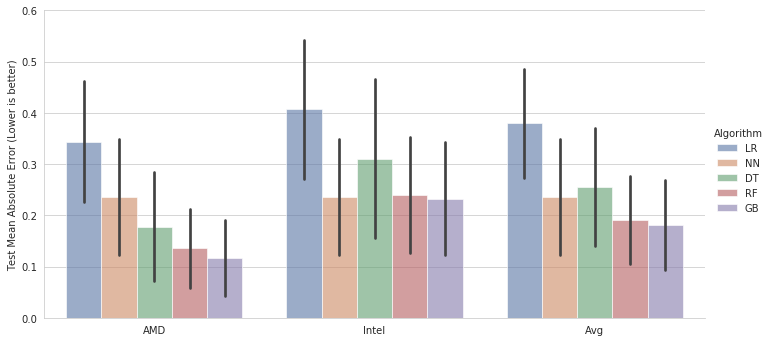

In [78]:
#df = pd.read_csv("results/case1.csv")
orig = ['Avg', 'AuthenticAMD', 'GenuineIntel']
rep = ['Avg', 'AMD', 'Intel']
res_hard = []
for i in range(df.shape[0]):
    for j in range(len(orig)):
        if df["Hardware"][i] == orig[j]:
            res_hard.append(rep[j])
df['Hard2'] = res_hard

df = df.query("Algorithm!='SV'")


def change_width(ax, new_value) :
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(locs[i//4] - (new_value * .5))

sns.set_style("whitegrid")
fig_size = (10, 5)
g = sns.catplot(
    data = df, 
    kind = "bar",
    x = "Hard2", 
    y = "Test Mean Absolute Error (Lower is better)", 
    hue = "Algorithm",
    ci="sd", 
    palette="deep", 
    alpha=.6, 
    height=fig_size[1],
    aspect=fig_size[0]/fig_size[1]
)
plt.xlabel("")
plt.ylim((0,0.6))
plt.savefig("./results/fig6_phoronix.png", dpi = 300)
plt.show()

In [62]:
np.mean(df.query("Hardware=='Avg'").query("Algorithm=='NN'")["Test Mean Absolute Error (Lower is better)"])

0.23617302525255685

In [63]:
np.mean(df.query("Hardware=='Avg'").query("Algorithm=='LR'")["Test Mean Absolute Error (Lower is better)"])

0.3793894320516682

In [64]:
np.mean(df.query("Hardware=='Avg'").query("Algorithm=='RF'")["Test Mean Absolute Error (Lower is better)"])

0.19093300466944005

In [65]:
np.mean(df.query("Hardware=='Avg'").query("Algorithm=='SV'")["Test Mean Absolute Error (Lower is better)"])

nan

In [66]:
np.mean(df.query("Hardware=='Avg'").query("Algorithm=='GB'")["Test Mean Absolute Error (Lower is better)"])

0.18074028245097518

In [67]:
np.mean(df.query("Hardware=='AuthenticAMD'")["Test Mean Absolute Error (Lower is better)"])

0.20201619053810163

In [68]:
np.mean(df.query("Hardware=='GenuineIntel'")["Test Mean Absolute Error (Lower is better)"])

0.2850787754388452

In [69]:
np.mean(df.query("Hardware=='AuthenticAMD'")
        .query("Algorithm=='GB'")["Test Mean Absolute Error (Lower is better)"])

0.11694901474023597

In [70]:
np.mean(df.query("Hardware=='Avg'")["Test Mean Absolute Error (Lower is better)"])

0.2486124770029859

In [71]:
np.percentile(df.query("Hardware=='Avg'")
              .query("Algorithm=='NN'")["Test Mean Absolute Error (Lower is better)"], 75)-np.percentile(df.query("Hardware=='Avg'")
              .query("Algorithm=='NN'")["Test Mean Absolute Error (Lower is better)"], 25)

0.16608315258861198

In [72]:
np.std(df.query("Hardware=='Avg'")
              .query("Algorithm=='RF'")["Test Mean Absolute Error (Lower is better)"])

0.08612341012776342

In [73]:
np.std(df.query("Hardware=='Avg'")
              .query("Algorithm=='GB'")["Test Mean Absolute Error (Lower is better)"])

0.08749791855571135

In [74]:
np.std(df.query("Hardware=='Avg'")
              .query("Algorithm=='NN'")["Test Mean Absolute Error (Lower is better)"])

0.11375859435961322

In [75]:
np.std(df.query("Hardware=='Avg'")
              .query("Algorithm=='LR'")["Test Mean Absolute Error (Lower is better)"])

0.10567780905288178

### Feature Importances

In [51]:
envs = pd.read_csv("data/ls_cp_info_post_join.csv").set_index("idPhoronix")
envs.head()

to_keep = ['perf', 'nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore',
           'ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
           'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize',
           'cp_cache_alignment', 'cp_addresssizes', 'ls_range', 'price_dollar',
           'TDP', 'Process', 'Release Year']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpufamily', 'ls_model', 'ls_stepping',  'ls_cpumhz', 'ls_cpumaxmhz', 
       'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache',
       'cp_cpufamily', 'cp_model', 'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
       'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
       'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize', 
       'cp_cache_alignment', 'price_dollar', 'TDP', 'Process', 'Release Year']

categ = ['ls_architecture', 'ls_cpuop-mode', 'ls_vendorid', 'cp_vendor_id', 'cp_addresssizes', 'ls_range']

# separate average perfs from standard deviations
def separate_perf(perf):
    raw_perf = []
    std_perf = []

    for p in perf:
        tab = str(p).replace(" ", "").split("+/-")
        raw_perf.append(tab[0])
        if len(tab) > 1:
            std_perf.append(tab[1])
        else:
            std_perf.append('')

    return (raw_perf, std_perf)

maes = []
bad_sys = []

for sys_name in os.listdir(system_dir):

        try:

            sys = pd.read_csv(system_dir+sys_name, index_col = 0)

            if sys.shape[0] > 150:

                sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]

                sys = sys.set_index("id")

                perf_meta = sys.join(envs)[to_keep].query("ls_cpu!='NaN'").query("nb_models==1").query("ls_vendorid=='AuthenticAMD' or ls_vendorid=='GenuineIntel'").fillna("0")

                avg, std = separate_perf(perf_meta["perf"])

                perf_meta.loc[:, "avg"] = avg

                del perf_meta["perf"]

                X = perf_meta[num]#.join(pd.get_dummies(perf_meta[categ]))
                y = [float(k) for k in perf_meta["avg"]]
                y = (y-np.mean(y))/np.std(y)

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

                alg = RandomForestRegressor()

                alg.fit(X_train, y_train)
                
                maes.append(alg.feature_importances_)

        except:
            bad_sys.append(sys_name)

In [52]:
for i in range(len(X.columns)):
    print(X_train.columns[i], np.round(np.mean([m[i] for m in maes]),4))

nb_models 0.0
ls_cpu 0.0731
ls_threadpercore 0.0022
ls_corepersocket 0.0611
ls_socket 0.0021
ls_numanode 0.0049
ls_cpufamily 0.0052
ls_model 0.0089
ls_stepping 0.0048
ls_cpumhz 0.0147
ls_cpumaxmhz 0.0577
ls_cpuminmhz 0.0093
ls_bogomips 0.0235
ls_l1dcache 0.013
ls_l1icache 0.0091
ls_l2cache 0.0102
ls_l3cache 0.1583
cp_cpufamily 0.0053
cp_model 0.0096
cp_stepping 0.0062
cp_cpumhz 0.0114
cp_cachesize 0.0175
cp_physicalid 0.0
cp_siblings 0.0807
cp_cpucores 0.0791
cp_apicid 0.0012
cp_cpuidlevel 0.0474
cp_bogomips 0.0463
cp_clflushsize 0.0
cp_cache_alignment 0.0008
price_dollar 0.0556
TDP 0.0669
Process 0.0498
Release Year 0.0643


#### SPEC

In [79]:
spec = pd.read_csv("../cpu_selection-master/spec_data.csv", index_col = 0)
spec.columns = ['bench', 'run time', 'score', 'idSPEC', 'freq', 'memory type', 'memory size']
spec = spec.drop(['score'], axis = 1)

# Intel Specifications
intel = pd.read_csv("./data/intel_chips_modif.csv").set_index('idSPEC')

# join spec cpu perfs with intel specif
spec = spec.join(intel, on='idSPEC').query("not uarch.isnull()").fillna(0)

perf = 'run time'

to_keep = ['bench', 'idSPEC',]

num = ['freq', 'memory size', 
        'launch_year', 'cache',  'bus_speed',  'max memory size',
        '# of memory channels', 'max memory bandwidth',
       'ecc memory supported', 'graphics base frequency',
       'graphics max dynamic frequency', 'graphics video max memory',
       '# of d isplays supported', 'graphics and imc lithography',
       'pci express revision', 'pci express lanes', 'lithography',
       '# of cores', '# of threads', 'base frequency', 'turbo frequency',
       'tdp-up frequency', 'tdp-up', 
       'tdp (W)', 'turbo boost technology', 'vpro', 'hyper-threading',
       '(vt-x)', '(vt-d)', 'tsx-ni', 'idle states', 'speedstep',
       'thermal mo nitoring', 'identity protection', 'aes new instructions',
       'secure key', 'trusted execution', 'execute disable bit', 'anti-theft',
       'price']

categ = ['memory type', 'memory types', 'chip type','bus_type', 'instruction set extensions', 
         'instruction set', 'processor number', 
         'tdp-down frequency', 't dp-down', 'processor graphics', 'type_cache', ]

workloads = pd.Series(spec['bench']).unique()

skus = pd.Series(spec['idSPEC']).unique()

uarchs = pd.Series(spec['uarch']).unique()

In [ ]:
res_rq1_spec = dict()

ms = [ElasticNet(l1_ratio=1), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
name_ms = ['LR', 'DT', 'RF', 'GB', 'NN']

ms_dict = dict()

for i in range(len(ms)):
    ms_dict[name_ms[i]]=ms[i]
            
blacklist_arch = ['penryn', 'nehalem','merom', 'silvermont']

rms = RMSprop(learning_rate=0.001)

for nms in name_ms:
    print(nms)
    for arch in uarchs:
        #print(arch)
        if arch not in blacklist_arch:
            res_rq1_spec[nms, arch] = []
    if nms == 'NN':
        for j in range(len(workloads)):
            print(workloads[j])
            df = spec.query("bench=='"+workloads[j]+"'")#.query("uarch=='"+arch+"'")
            X = df[num].join(df['uarch'])#.join(pd.get_dummies(df[categ]))
            y = df[perf]
            y = (y-np.mean(y))/np.std(y)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
            
            X_train = X_train.drop(['uarch'], axis = 1)

            model = Sequential()

            model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],)))
            model.add(Dense(100, activation = 'tanh'))
            #model.add(Dropout(0.5))
            model.add(Dense(100, activation = 'tanh'))
            model.add(Dense(100, activation = 'tanh'))
            #model.add(Dropout(0.2))
            model.add(Dense(1))

            model.compile(loss = 'mae', optimizer = rms) #optimizer = 'adam')

            model.fit(np.array(X_train, dtype=float), y_train, epochs = 300, verbose =1)

            uarch_test = np.array(X_test['uarch'])

            X_test = X_test.drop(['uarch'], axis = 1)

            y_pred = model.predict(np.array(X_test, dtype=float))

            y_test = np.array(y_test)

            for i in range(len(uarch_test)):
                if uarch_test[i] not in blacklist_arch:
                    res_rq1_spec[nms, uarch_test[i]].append(np.abs(y_test[i]-y_pred[i])[0])
    else:
        for j in range(len(workloads)):
            print(workloads[j])
            df = spec.query("bench=='"+workloads[j]+"'")#.query("uarch=='"+arch+"'")
            X = df[num].join(df['uarch']).join(pd.get_dummies(df[categ]))
            y = df[perf]
            y = (y-np.mean(y))/np.std(y)
            for i in range(20):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
                X_train = X_train.drop(['uarch'], axis = 1)
                clf = ms_dict[nms]
                clf.fit(X_train, y_train)
                uarch_test = np.array(X_test['uarch'])
                X_test = X_test.drop(['uarch'], axis = 1)
                y_pred = clf.predict(X_test)
                y_test = np.array(y_test)
                for i in range(len(uarch_test)):
                    if uarch_test[i] not in blacklist_arch:
                        res_rq1_spec[nms, uarch_test[i]].append(np.abs(y_test[i]-y_pred[i]))

LR
400.perlbench
401.bzip2
403.gcc
429.mcf
445.gobmk
456.hmmer
458.sjeng
462.libquantum
464.h264ref
471.omnetpp
473.astar
483.xalancbmk
410.bwaves
416.gamess
433.milc
434.zeusmp
435.gromacs
436.cactusADM
437.leslie3d
444.namd
450.soplex
453.povray
454.calculix
459.GemsFDTD
465.tonto
470.lbm
481.wrf
482.sphinx3
DT
400.perlbench
401.bzip2
403.gcc
429.mcf
445.gobmk
456.hmmer
458.sjeng
462.libquantum
464.h264ref
471.omnetpp
473.astar
483.xalancbmk
410.bwaves
416.gamess
433.milc
434.zeusmp
435.gromacs
436.cactusADM
437.leslie3d
444.namd
450.soplex
453.povray
454.calculix
459.GemsFDTD
465.tonto
470.lbm
481.wrf
482.sphinx3
RF
400.perlbench
401.bzip2
403.gcc
429.mcf
445.gobmk


In [ ]:
res = []
for i in res_rq1_spec.keys():
    nms, arch = i
    val = res_rq1_spec[i]
    for v in val:
        res.append((v, arch, nms))
for i in res_rq1_spec.keys():
    nms, arch = i
    val = res_rq1_spec[i]
    for v in val:
        res.append((v, 'Avg', nms))
res

df = pd.DataFrame(res)
df.columns = ["Test Mean Absolute Error (Lower is better)", "Architecture", "Algorithm"]
df.to_csv('./data/fig6_data_spec.csv')

sns.set_style("whitegrid")
fig_size = (10, 5)
g = sns.catplot(
    data = df, 
    kind = "bar",
    x = "Architecture", 
    y = "Test Mean Absolute Error (Lower is better)", 
    hue = "Algorithm",
    ci="sd", 
    palette="deep", 
    alpha=.6, 
    height=fig_size[1],
    aspect=fig_size[0]/fig_size[1]
)
plt.xlabel("")
plt.ylim((0,0.6))
plt.savefig("./results/fig6_spec.png", dpi = 300)
plt.show()

#### GeekBench

In [61]:
with open('../cpu_selection-master/geek_data.json','r') as geek_data:
    geek = pd.DataFrame(json.load(geek_data))
    geek.columns = ['idGeekBench', 'freq', 'L2', 'L3', 'memory', 
                    'bench', 'single/multicore', 'score', 'perf']
geek = geek.drop(['score'], axis = 1)

# Intel Specifications
intel = pd.read_csv("./data/intel_chips_modif.csv").set_index('idGeekBench')

geek = geek.join(intel, on='idGeekBench').query("not uarch.isnull()").fillna(0)

geek['perf'] = [float(k) for k in geek['perf']]

perf = 'perf'

to_keep = ['bench', 'idGeekBench']

num = ['freq', 'memory', 'L3', 'single/multicore',
        'launch_year', 'cache', 'bus_speed', 'max memory size',
        '# of memory channels', 'max memory bandwidth',
       'ecc memory supported', 'graphics base frequency',
       'graphics max dynamic frequency', 'graphics video max memory',
       '# of d isplays supported', 'graphics and imc lithography',
       'pci express revision', 'pci express lanes', 'lithography',
       '# of cores', '# of threads', 'base frequency', 'turbo frequency',
       'tdp-up frequency', 'tdp-up', 
       'tdp (W)', 'turbo boost technology', 'vpro', 'hyper-threading',
       '(vt-x)', '(vt-d)', 'tsx-ni', 'idle states', 'speedstep',
       'thermal mo nitoring', 'identity protection', 'aes new instructions',
       'secure key', 'trusted execution', 'execute disable bit', 'anti-theft',
       'price']

categ = ['memory types', 'chip type','bus_type', 'instruction set extensions', 
         'instruction set', 'processor number', 
         'tdp-down frequency', 't dp-down', 'uarch', 'processor graphics', 'type_cache']

workloads = pd.Series(geek['bench']).unique()

skus = pd.Series(geek['idGeekBench']).unique()

uarchs = pd.Series(geek['uarch']).unique()

In [62]:
uarchs

array(['westmere', 'haswell', 'ivy bridge', 'skylake', 'broadwell',
       'sandy bridge', 'penryn', 'nehalem', 'merom'], dtype=object)

In [69]:
ms = [ElasticNet(l1_ratio=1), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]#, SVR]
name_ms = ['LR', 'DT', 'RF', 'GB', 'NN']#, 'SV']

ms_dict = dict()

for i in range(len(ms)):
    ms_dict[name_ms[i]]=ms[i]

rms = RMSprop(learning_rate=0.0001)

for nms in name_ms:
    print(nms)
    for arch in uarchs:
        print(arch)
        maes = []
        if arch not in ['penryn', 'nehalem','merom', 'silvermont']:# and (nms, arch) not in res_rq1_geek:
            res_rq1_geek[nms, arch] = []
            for j in range(len(workloads)):
                print(workloads[j])
                if nms == 'NN':
                    df = geek.query("bench=='"+workloads[j]+"'").query("uarch=='"+arch+"'")
                    X = df[num].join(pd.get_dummies(df[categ]))
                    y = df[perf]
                    y = (y-np.mean(y))/np.std(y)
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

                    model = Sequential()

                    model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],)))
                    model.add(Dense(100, activation = 'tanh'))
                    #model.add(Dropout(0.5))
                    model.add(Dense(100, activation = 'tanh'))
                    model.add(Dense(100, activation = 'tanh'))
                    #model.add(Dropout(0.2))
                    model.add(Dense(1))

                    model.compile(loss = 'mae', optimizer = rms) #optimizer = 'adam')

                    model.fit(np.array(X_train, dtype=float), y_train, epochs = 300, verbose =1)

                    y_pred = model.predict(np.array(X_test, dtype=float))

                    y_test = np.array(y_test)
                
                    res_rq1_geek[nms, arch].append(mean_absolute_error(y_test, y_pred))
                    
                else:
                    df = geek.query("bench=='"+workloads[j]+"'").query("uarch=='"+arch+"'")
                    X = df[num].join(pd.get_dummies(df[categ]))
                    y = df[perf]
                    y = (y-np.mean(y))/np.std(y)
                    for i in range(20):
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
                        clf = ms_dict[nms]
                        clf.fit(X_train, y_train)
                        y_pred = clf.predict(X_test)
                        maes.append(mean_absolute_error(y_test, y_pred))
        res_rq1_geek[nms, arch] = maes

LR
westmere
AES
Twofish
SHA1
SHA2
BZip2 Compress
BZip2 Decompress
JPEG Compress
JPEG Decompress
PNG Compress
PNG Decompress
Sobel
Lua
Dijkstra
BlackScholes
Mandelbrot
Sharpen Filter
Blur Filter
SGEMM
DGEMM
SFFT
DFFT
N-Body
Ray Trace
Stream Copy
Stream Scale
Stream Add
Stream Triad
haswell
AES
Twofish
SHA1
SHA2
BZip2 Compress
BZip2 Decompress
JPEG Compress
JPEG Decompress
PNG Compress
PNG Decompress
Sobel
Lua
Dijkstra
BlackScholes
Mandelbrot
Sharpen Filter
Blur Filter
SGEMM
DGEMM
SFFT
DFFT
N-Body
Ray Trace
Stream Copy
Stream Scale
Stream Add
Stream Triad
ivy bridge
AES
Twofish
SHA1
SHA2
BZip2 Compress
BZip2 Decompress
JPEG Compress
JPEG Decompress
PNG Compress
PNG Decompress
Sobel
Lua
Dijkstra
BlackScholes
Mandelbrot
Sharpen Filter
Blur Filter
SGEMM
DGEMM
SFFT
DFFT
N-Body
Ray Trace
Stream Copy
Stream Scale
Stream Add
Stream Triad
skylake
AES
Twofish
SHA1
SHA2
BZip2 Compress
BZip2 Decompress
JPEG Compress
JPEG Decompress
PNG Compress
PNG Decompress
Sobel
Lua
Dijkstra
BlackScholes
Mandelb

KeyboardInterrupt: 

KeyboardInterrupt: 

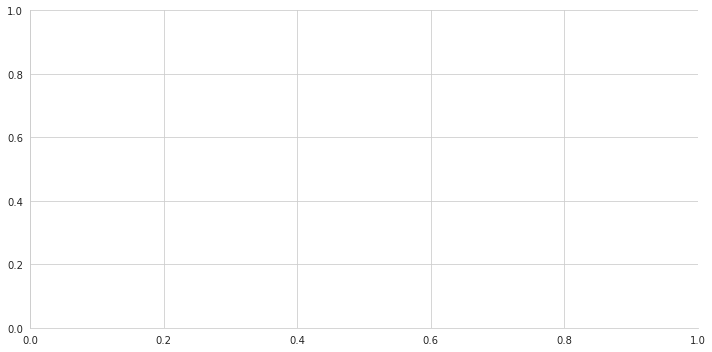

In [66]:
res = []
for i in res_rq1_geek.keys():
    nms, arch = i
    val = res_rq1_geek[i]
    for v in val:
        res.append((v, arch, nms))
        res.append((v, 'Avg', nms))
res

df = pd.DataFrame(res)
df.columns = ["Test Mean Absolute Error (Lower is better)", "Architecture", "Algorithm"]
#df.to_csv('./data/fig6_data_geek.csv')

sns.set_style("whitegrid")
fig_size = (10, 5)
g = sns.catplot(
    data = df, 
    kind = "bar", 
    x = "Architecture", 
    y = "Test Mean Absolute Error (Lower is better)", 
    hue = "Algorithm", 
    ci="sd", 
    palette="deep", 
    alpha=.6, 
    height=fig_size[1],
    aspect=fig_size[0]/fig_size[1]
)
plt.xlabel("")
plt.ylim((0,0.6))
plt.savefig("./results/fig6_geek.png", dpi = 300)
plt.show()

### Figure 7

In [79]:
system_dir = './data/systems/'
hard_dir = './data/procs/'

envs = pd.read_csv("data/ls_cp_info_post_join.csv").set_index("id")
envs.head()

to_keep = ['perf', 'nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore',
           'ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
           'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize',
           'cp_cache_alignment', 'cp_addresssizes', 'ls_range', 'price_dollar',
           'TDP', 'Process', 'Release Year']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpufamily', 'ls_model', 'ls_stepping',  'ls_cpumhz', 'ls_cpumaxmhz', 
       'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache',
       'cp_cpufamily', 'cp_model', 'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
       'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
       'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize', 
       'cp_cache_alignment', 'price_dollar', 'TDP', 'Process', 'Release Year']

categ = ['ls_architecture', 'ls_cpuop-mode', 'ls_vendorid', 'cp_vendor_id', 'cp_addresssizes', 'ls_range']

res = []

# add profile information
envs = pd.read_csv("data/ls_cp_info_post_join.csv").set_index("idPhoronix")
envs.head()

to_keep = ['perf', 'nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore',
           'ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
           'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize',
           'cp_cache_alignment', 'cp_addresssizes', 'ls_range', 'price_dollar',
           'TDP', 'Process', 'Release Year']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpufamily', 'ls_model', 'ls_stepping',  'ls_cpumhz', 'ls_cpumaxmhz', 
       'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache',
       'cp_cpufamily', 'cp_model', 'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
       'cp_physicalid', 'cp_siblings', 'cp_cpucores', 'cp_apicid',
       'cp_cpuidlevel', 'cp_bogomips', 'cp_clflushsize', 
       'cp_cache_alignment', 'price_dollar', 'TDP', 'Process', 'Release Year']

categ = ['ls_architecture', 'ls_cpuop-mode', 'ls_vendorid', 'cp_vendor_id', 'cp_addresssizes', 'ls_range']

# separate average perfs from standard deviations
def separate_perf(perf):
    raw_perf = []
    std_perf = []

    for p in perf:
        tab = str(p).replace(" ", "").split("+/-")
        raw_perf.append(tab[0])
        if len(tab) > 1:
            std_perf.append(tab[1])
        else:
            std_perf.append('')

    return (raw_perf, std_perf)

maes = []
res = []
comp_col = False

for sys_name in os.listdir(system_dir):

        #try:

        sys = pd.read_csv(system_dir+sys_name, index_col = 0)

        if sys.shape[0] > 1:

            sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]

            sys = sys.set_index("id")

            perf_meta = sys.join(envs)[to_keep].query("ls_cpu!='NaN'").query("ls_vendorid=='AuthenticAMD' or ls_vendorid=='GenuineIntel'").fillna("0")
            
            avg, std = separate_perf(perf_meta["perf"])

            perf_meta.loc[:, "avg"] = avg

            y = [float(k) for k in perf_meta["avg"]]
            y = (y-np.mean(y))/np.std(y)

            del perf_meta['avg']
            del perf_meta['perf']

            ind = [k for k in perf_meta.index]

            if not comp_col:
                cols = []
                cols.append("name_proc")
                cols.extend(perf_meta.columns)
                cols.append("name_workl")
                cols.append("score")
                comp_col = True

            for i in range(perf_meta.shape[0]):
                tab = []
                tab.append(ind[i])
                tab.extend(perf_meta.iloc[i])
                tab.append(sys_name[:-4])
                tab.append(y[i])
                res.append(tab)

        #except:
        #    print(sys_name)


df_agg = pd.DataFrame(res)
df_agg.columns = cols
to_keep2 = num
to_keep2.extend(['name_proc', 'name_workl', 'score'])
df_agg = df_agg[to_keep2]#.join(pd.get_dummies(df_agg[categ]))
df_agg

,nb_models,ls_cpu,ls_threadpercore,ls_corepersocket,ls_socket,ls_numanode,ls_cpufamily,ls_model,ls_stepping,ls_cpumhz,...,cp_bogomips,cp_clflushsize,cp_cache_alignment,price_dollar,TDP,Process,Release Year,name_proc,name_workl,score
0,1.0,12.0,2,6,1,1,25,33,0,3579.08,...,7386.52,64.0,64.0,315,65,7,2020,AMDRyzen55600X6-Core,pts-git,-0.497598
1,1.0,16.0,2,8,1,1,6,167,1,3500,...,7008.00,64.0,64.0,544,125,14,2021,IntelCorei9-11900K,pts-git,-0.479653
2,1.0,32.0,2,16,1,1,25,33,0,2200,...,6800.03,64.0,64.0,869,105,7,2020,AMDRyzen95950X16-Core,pts-git,-0.479653
3,1.0,16.0,2,8,1,1,25,33,0,2236.51,...,7585.67,64.0,64.0,465,105,7,2020,AMDRyzen75800X8-Core,pts-git,-0.479653
4,1.0,24.0,2,12,1,1,25,33,0,4950.19,...,7400.53,64.0,64.0,583,105,7,2020,AMDRyzen95900X12-Core,pts-git,-0.461708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,1.0,8.0,2,4,1,1,6,71,1,3610.79,...,6598.05,64.0,64.0,175,65,14,2015,IntelCorei7-5775C,pts-smhasher,0.224775
18481,1.0,4.0,1,4,1,1,6,60,3,4401,...,7999.48,64.0,64.0,235,88,22,2014,IntelCorei7-4790K,pts-smhasher,0.864722
18482,1.0,4.0,1,4,1,1,6,58,9,1600,...,6719.89,64.0,64.0,200,77,22,2012,IntelCorei5-3470,pts-smhasher,0.922899
18483,1.0,4.0,1,4,1,1,6,158,11,3629.9,...,7200.00,64.0,64.0,200,62,14,2017,IntelCorei3-8100,pts-smhasher,1.010165


In [80]:
len(works)

28

In [132]:
works = pd.Series(df_agg["name_workl"]).unique()

res = []

grd = dict()
for i in range(n_clusters):
    grd[i] = [names[j] for j in range(len(groups)) if groups[j]==i]

for w in works[0:10]:
    
    s = 0
    for i in range(n_clusters):
        if w in grd[i]:
            s = i
    print(s)
    
    df_rest = df_agg.query("name_workl!='"+w+"'")

    X_rest = df_rest.drop(['score','name_proc','name_workl'], axis=1)
    y_rest = df_rest['score']
    
    df = df_agg.query("""name_workl in """+str(grd[s]))
    X = df.drop(['score','name_proc','name_workl'], axis=1)
    y = df['score']

    clf = RandomForestRegressor()

    clf.fit(X_rest,y_rest)
    y_pred = clf.predict(X)

    res.append(mean_absolute_error(y_pred, y))

print(np.mean(res))
print(np.median(res))

1
0
3
1
1
0
1
3
1
1
0.6259593669785313


In [150]:
works = pd.Series(df_agg["name_workl"]).unique()

res = []

grd = dict()
for i in range(n_clusters):
    grd[i] = [names[j] for j in range(len(groups)) if groups[j]==i]

for w in works[0:10]:
    
    #s = 0
    #for i in range(n_clusters):
    #    if w in grd[i]:
    #        s = i
    #print(s)
    
    df_rest = df_agg.query("name_workl!='"+w+"'")

    X_rest = df_rest.drop(['score','name_proc','name_workl'], axis=1)
    y_rest = df_rest['score']
    
    df = df_agg.query("""name_workl in """+str(grd[s]))
    X = df.drop(['score','name_proc','name_workl'], axis=1)
    y = df['score']

    clf = RandomForestRegressor()

    clf.fit(X_rest,y_rest)
    y_pred = clf.predict(X)

    res.append(mean_absolute_error(y_pred, y))

print(np.mean(res))
print(np.median(res))

1
0
3
1
1
0
1
3


KeyboardInterrupt: 

In [84]:
np.median(df_agg.groupby(["name_proc"]).count()['nb_models'])

4.0

In [131]:
str(grd[s])

"['pts-git', 'pts-php', 'pts-smallpt', 'pts-pts-self-test', 'pts-arrayfire', 'pts-onnx', 'pts-java-scimark2', 'pts-rbenchmark', 'pts-geekbench', 'pts-plaidml', 'pts-mandelgpu', 'pts-aircrack-ng', 'pts-build-imagemagick', 'pts-blake2', 'pts-neatbench', 'pts-node-octane', 'system-gegl', 'pts-mencoder', 'pts-etqw-demo', 'pts-trislam', 'pts-nwchem', 'system-mpv', 'pts-mixbench', 'pts-batman-origins', 'pts-dow3', 'pts-neat', 'pts-mkl-dnn', 'pts-core-latency', 'pts-mpcbench', 'pts-metroll-redux', 'pts-ctx-clock', 'pts-dirt-showdown', 'pts-blogbench', 'pts-dolfyn', 'pts-mnn', 'pts-ior', 'pts-deus-exmd', 'pts-portal', 'system-rsvg', 'pts-encode-flac', 'pts-rodinia', 'pts-waifu2x-ncnn', 'pts-postmark', 'pts-etlegacy', 'pts-sqlite-speedtest', 'pts-pybench', 'pts-sunflow', 'pts-octanebench', 'pts-apache', 'pts-tesseract', 'pts-xonotic', 'pts-mt-dgemm', 'pts-unpack-linux', 'pts-dota2', 'pts-compress-rar', 'pts-c-ray', 'pts-aobench', 'pts-j2dbench', 'pts-build-gcc', 'pts-luxcorerender', 'pts-geexla

In [122]:
df_agg.query("name_workl in [1,2]")

,nb_models,ls_cpu,ls_threadpercore,ls_corepersocket,ls_socket,ls_numanode,ls_cpufamily,ls_model,ls_stepping,ls_cpumhz,...,cp_bogomips,cp_clflushsize,cp_cache_alignment,price_dollar,TDP,Process,Release Year,name_proc,name_workl,score


In [ ]:
works = pd.Series(df_agg["name_workl"]).unique()

res = []

grd = dict()
for i in range(n_clusters):
    grd[i] = [names[j] for j in range(len(groups)) if groups[j]==i]

for w in works[0:10]:
    
    df_rest = df_agg.query("name_workl!='"+w+"'")

    X_rest = df_rest.drop(['score','name_proc','name_workl'], axis=1)
    y_rest = df_rest['score']

    df = df_agg.query("name_workl=='"+w+"'")
    X = df.drop(['score','name_proc','name_workl'], axis=1)
    y = df['score']

    clf = RandomForestRegressor()

    clf.fit(X_rest,y_rest)
    y_pred = clf.predict(X)

    res.append(mean_absolute_error(y_pred, y))

print(np.mean(res))